In [80]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
import gsw
from seabird.cnv import fCNV
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [20]:
iso_NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/2013_short_slice_NEP36_along_isopycnal_larger_offshore_rho_correct.nc')

iso_spic = iso_NEP.variables['spiciness']
isot = iso_NEP.variables['isot']

vel_iso_NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_NEP36_2013_along_isopycnal_larger_offshore_velocities.nc')
u_vel_iso = vel_iso_NEP.variables['u_velocity']
v_vel_iso = vel_iso_NEP.variables['v_velocity']
isot_vel = vel_iso_NEP.variables['isot']

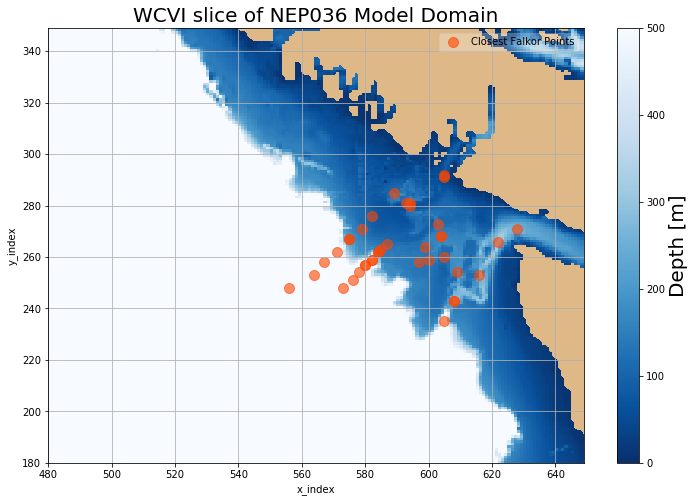

In [61]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))


lon = bathy['nav_lon'][180:350, 480:650]
lat = bathy['nav_lat'][180:350, 480:650]

lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]

y = np.empty_like(lat_location)
x = np.empty_like(lat_location)


for i in np.arange(lat_location.shape[0]):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_location[i],lat_location[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
n = np.empty_like(lat_location)
m = np.empty_like(lat_location)


for i in np.arange(lat_location.shape[0]):
    n[i], m[i] = geo_tools.find_closest_model_point(
               lon_location[i],lat_location[i],lon,lat,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

y = y.astype(int)
x = x.astype(int)

n = n.astype(int)
m = m.astype(int)

cmap = plt.get_cmap('Blues_r')

cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(12,8)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=500)

ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.6, label = 'Closest Falkor Points')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()

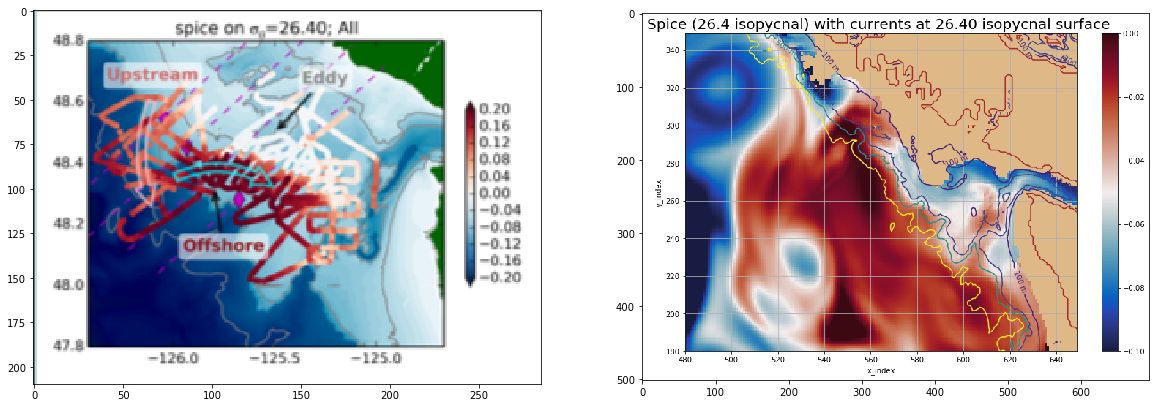

In [56]:
import matplotlib.image as mpimg

img1 = mpimg.imread('/home/ssahu/saurav/3D_images_for_video_spice/Jody_Poster.png')
img2 = mpimg.imread('/home/ssahu/saurav/3D_images_for_video_spice/26.4_surface_spice_Falkor.png')


figure, ax = plt.subplots(1, 2, figsize=(20,20));
plt.figure(1)
plt.subplot(121)
plt.imshow(img1)

plt.subplot(122)
plt.imshow(img2)
plt.show()

In [48]:
def plot_isopycnal_spice(t1, t2, iso_level):
    

    val_iso = iso_spic[t1:t2,iso_level,...]
    val_iso[np.isnan(val_iso)] = 0
    val_iso = np.ma.masked_equal(val_iso, value=0)
    val_iso = np.mean(val_iso, axis=0)




#     u_week = u_vel_iso[t1:t2,iso_level,:,:]
#     v_week = v_vel_iso[t1:t2,iso_level,:,:]


#     u_mean = np.mean(u_week, axis=0)
#     v_mean = np.mean(v_week, axis=0)
#     arrow_step = 5




    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


    Z = bathy.variables['Bathymetry']

    y_wcvi_slice = np.array(np.arange(180,350))
    x_wcvi_slice = np.array(np.arange(480,650))


    lon = bathy['nav_lon'][180:350, 480:650]
    lat = bathy['nav_lat'][180:350, 480:650]

    lon_model = bathy['nav_lon'][...]
    lat_model = bathy['nav_lat'][...]

#     y = np.empty_like(lat_location)
#     x = np.empty_like(lat_location)


#     for i in np.arange(lat_location.shape[0]):
#         y[i], x[i] = geo_tools.find_closest_model_point(
#                    lon_location[i],lat_location[i],lon_model,lat_model,tols={
#             'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

#     n = np.empty_like(lat_location)
#     m = np.empty_like(lat_location)


#     for i in np.arange(lat_location.shape[0]):
#         n[i], m[i] = geo_tools.find_closest_model_point(
#                    lon_location[i],lat_location[i],lon,lat,tols={
#             'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

#     y = y.astype(int)
#     x = x.astype(int)

#     n = n.astype(int)
#     m = m.astype(int)

    # cmap = plt.get_cmap('Blues')
    cmap = plt.get_cmap(cmo.cm.balance)


    cmap.set_bad('burlywood')
    fig, ax = plt.subplots(1, 1, figsize=(12,8)); ax.grid()
    # p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=1000)
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels =[0, 100, 200, 500, 1000])
#     CS = ax.contour(x_wcvi_slice,y_wcvi_slice,depth_rho_0, levels =[0, 100, 200, 1000])
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=10)

    q = ax.pcolormesh(x_wcvi_slice, y_wcvi_slice, val_iso[:], cmap=cmap, vmin=-0.1, vmax=0)
    cbar = fig.colorbar(q, ax=ax)

#     u_tzyx, v_tzyx = viz_tools.unstagger(u_mean[...], v_mean[...])
#     u_tzyx = np.ma.masked_array(u_tzyx, mask= 1- umask[level_of_currents,1:,1:,])
#     v_tzyx = np.ma.masked_array(v_tzyx, mask= 1- vmask[level_of_currents,1:,1:])
    speeds = np.sqrt(np.square(u_mean) + np.square(v_mean))
    quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_mean[::arrow_step,::arrow_step], v_mean[::arrow_step,::arrow_step] , speeds[::arrow_step, ::arrow_step], pivot='mid', cmap=cmap, width=0.005, minshaft= 0.5)


    # ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.6, label = 'Closest Falkor Points')
    legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

    ax.set_xlabel('x_index')
    ax.set_ylabel('y_index')
    ax.set_title('Spice (26.4 isopycnal) with currents at {d:.2f} isopycnal surface '.format(d = isot[iso_level]), fontsize=20)

    viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')
    # cbar = fig.colorbar(p, ax=ax)
    # cbar.ax.set_ylabel('Depth [m]', fontsize=20)
    ax.grid()


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


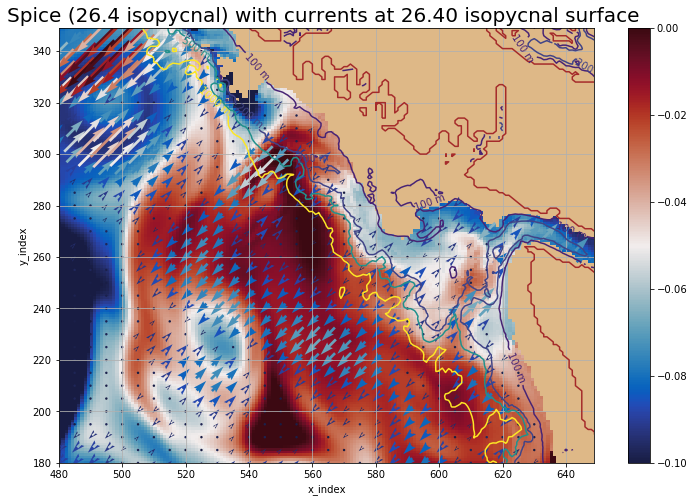

In [50]:
# level_of_currents = 0
t1 =112
t2 =123
iso_level = 4


plot_isopycnal_spice(t1, t2, iso_level)

In [37]:
NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_2013_T_S_Spice_larger_offshore_rho_correct.nc')


sal = NEP.variables['vosaline']
temp = NEP.variables['votemper']
spic = NEP.variables['spiciness']
rho = NEP.variables['density']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht'][:32]





mask = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/mesh_mask.nc')

tmask = mask.variables['tmask'][0,:32,180:350, 480:650]
umask = mask.variables['umask'][0,:32,180:350, 480:650]
vmask = mask.variables['vmask'][0,:32,180:350, 480:650]
mbathy = mask.variables['mbathy'][0,180:350, 480:650]


y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))



In [64]:
sal_week = sal[112:123,:,:,:]
temp_week = temp[112:123,:,:,:]
spic_week = spic[112:123,:,:,:]
rho_week = spic[112:123,:,:,:]

sal_mean = np.mean(sal_week, axis=0)
temp_mean = np.mean(temp_week, axis=0)
spic_mean = np.mean(spic_week, axis=0)
rho_mean  = np.mean(rho_week, axis=0)


In [38]:
def U_timeseries_at_WCVI_locations(grid_U):
    
    u_vel = grid_U.variables['uo'][:,:,1:,1:]

    
    vector_u = namedtuple('vector_u', 'u_vel')

    return vector_u(u_vel)


def V_timeseries_at_WCVI_locations(grid_V):
    
    v_vel = grid_V.variables['vo'][:,:,1:,1:]

    
    vector_v = namedtuple('vector_v', 'v_vel')

    return vector_v(v_vel)

In [39]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict

import os


u_vel = np.empty((180,zlevels.shape[0],y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))
v_vel = np.empty((180,zlevels.shape[0],y_wcvi_slice.shape[0],x_wcvi_slice.shape[0]))



i = 0

for file in sorted(glob.glob('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d*grid_U*.nc')):
    vector_u = U_timeseries_at_WCVI_locations(nc.Dataset(file))
    u_vel[i:i+10,...] = vector_u[0]
    i = i+10

j = 0
for file in sorted(glob.glob('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d*grid_V*.nc')):
    vector_v = V_timeseries_at_WCVI_locations(nc.Dataset(file))
    v_vel[j:j+10,...] = vector_v[0]
    j = j+10
    

In [44]:
def plot_isopycnal_spice(level_of_currents, t1, t2, iso_level):
    

    val_iso = iso_spic[t1:t2,iso_level,...]
    val_iso[np.isnan(val_iso)] = 0
    val_iso = np.ma.masked_equal(val_iso, value=0)
    val_iso = np.mean(val_iso, axis=0)




    u_week = u_vel[t1:t2,level_of_currents,:,:]
    v_week = v_vel[t1:t2,level_of_currents,:,:]


    u_mean = np.mean(u_week, axis=0)
    v_mean = np.mean(v_week, axis=0)
    arrow_step = 5




    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


    Z = bathy.variables['Bathymetry']

    y_wcvi_slice = np.array(np.arange(180,350))
    x_wcvi_slice = np.array(np.arange(480,650))


    lon = bathy['nav_lon'][180:350, 480:650]
    lat = bathy['nav_lat'][180:350, 480:650]

    lon_model = bathy['nav_lon'][...]
    lat_model = bathy['nav_lat'][...]

#     y = np.empty_like(lat_location)
#     x = np.empty_like(lat_location)


#     for i in np.arange(lat_location.shape[0]):
#         y[i], x[i] = geo_tools.find_closest_model_point(
#                    lon_location[i],lat_location[i],lon_model,lat_model,tols={
#             'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

#     n = np.empty_like(lat_location)
#     m = np.empty_like(lat_location)


#     for i in np.arange(lat_location.shape[0]):
#         n[i], m[i] = geo_tools.find_closest_model_point(
#                    lon_location[i],lat_location[i],lon,lat,tols={
#             'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

#     y = y.astype(int)
#     x = x.astype(int)

#     n = n.astype(int)
#     m = m.astype(int)

    # cmap = plt.get_cmap('Blues')
    cmap = plt.get_cmap(cmo.cm.balance)


    cmap.set_bad('burlywood')
    fig, ax = plt.subplots(1, 1, figsize=(12,8)); ax.grid()
    # p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=1000)
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels =[0, 100, 200, 500, 1000])
#     CS = ax.contour(x_wcvi_slice,y_wcvi_slice,depth_rho_0, levels =[0, 100, 200, 1000])
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=10)

    q = ax.pcolormesh(x_wcvi_slice, y_wcvi_slice, val_iso[:], cmap=cmap, vmin=-0.1, vmax=0)
    cbar = fig.colorbar(q, ax=ax)

    u_tzyx, v_tzyx = viz_tools.unstagger(u_mean[...], v_mean[...])
    u_tzyx = np.ma.masked_array(u_tzyx, mask= 1- umask[level_of_currents,1:,1:,])
    v_tzyx = np.ma.masked_array(v_tzyx, mask= 1- vmask[level_of_currents,1:,1:])
    speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
    quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_tzyx[::arrow_step,::arrow_step], v_tzyx[::arrow_step,::arrow_step] , speeds[::arrow_step, ::arrow_step], pivot='mid', cmap=cmap, width=0.005, minshaft= 0.5)


    # ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.6, label = 'Closest Falkor Points')
    legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)

    ax.set_xlabel('x_index')
    ax.set_ylabel('y_index')
    ax.set_title('Spice (26.4 isopycnal) with currents at {d:.2f}m '.format(d = zlevels[level_of_currents]), fontsize=20)

    viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')
    # cbar = fig.colorbar(p, ax=ax)
    # cbar.ax.set_ylabel('Depth [m]', fontsize=20)
    ax.grid()


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


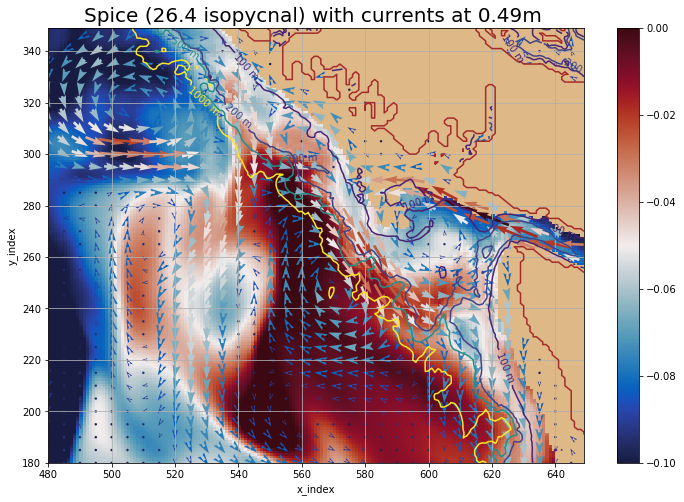

In [45]:
level_of_currents = 0
t1 =90
t2 =120
iso_level = 4


plot_isopycnal_spice(level_of_currents, t1, t2, iso_level)

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


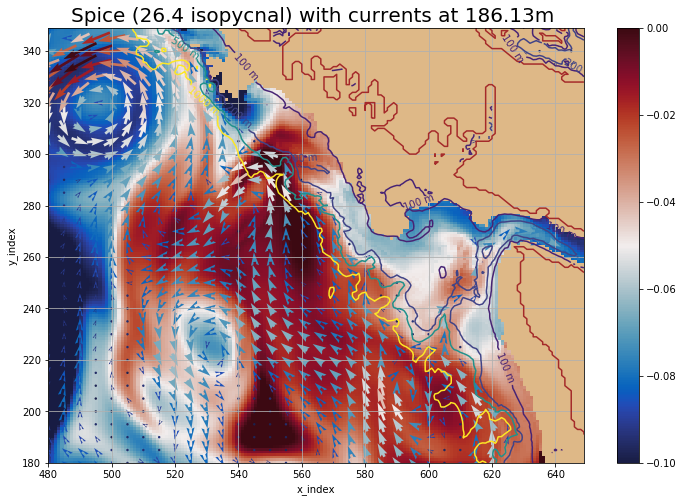

In [46]:
level_of_currents = 25
t1 =112
t2 =123
iso_level = 4


plot_isopycnal_spice(level_of_currents, t1, t2, iso_level)

In [57]:
def falkor_locations(profile):

    pressure = profile['PRES'][:]
    PT = profile['potemperature'][:]
    T = profile['TEMP'][:]
    SP = profile['PSAL'][:]
    lat = np.nanmean(profile['LATITUDE'][:])
    lon = np.nanmean(profile['LONGITUDE'][:])
    
    z = gsw.z_from_p(-pressure, lat)
    
    falkor_scalar_ts = namedtuple('falkor_scalar_ts', 'temp, sal, lat, lon, z')

    return falkor_scalar_ts(PT, SP, lat, lon, z)

In [58]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict

import os


file = []

i = 0
for file_number in sorted(glob.glob('/home/ssahu/saurav/Falkor_code/*.cnv')):
    
    file.append(file_number)
    
    i = i+1


In [59]:
temp_location = []
sal_location = []
lat_location = []
lon_location = []
z_location = []
# sal_location[j,:] = falkor_scalar_ts[1]
# lat_location[j] = falkor_scalar_ts[2]
# lon_location[j] = falkor_scalar_ts[3]


time_location = []

for example in file:
    time_location = np.append(arr= time_location, values= example[51:-4])
    
time_location = time_location.astype(int)
time_location[:] = time_location[:] + 112 

for j in np.arange(len(file)):

    falkor_scalar_ts = falkor_locations(fCNV(file[j]))
    
    
    temp_that_file = np.empty(falkor_scalar_ts[0].shape)
    temp_that_file = falkor_scalar_ts[0]
    temp_location.append(temp_that_file)
    
    sal_that_file = np.empty(falkor_scalar_ts[1].shape)
    sal_that_file = falkor_scalar_ts[1]
    sal_location.append(sal_that_file)
    
    
    z_that_file = np.empty(falkor_scalar_ts[4].shape)
    z_that_file = falkor_scalar_ts[4]
    z_location.append(z_that_file)    
    
    lat_that_file = np.empty(falkor_scalar_ts[2].shape)
    lat_that_file = falkor_scalar_ts[2]
    lat_location.append(lat_that_file)
    
    lon_that_file = np.empty(falkor_scalar_ts[3].shape)
    lon_that_file = falkor_scalar_ts[3]
    lon_location.append(lon_that_file)
    
    
    

    
temp_location = np.array(temp_location)
sal_location = np.array(sal_location)
z_location = np.array(z_location)
lat_location = np.array(lat_location)
lon_location = np.array(lon_location)



DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD002_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD003_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD004_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD005_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD006_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD007_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD008_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD009_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD010_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD011_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD012_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD013_20130

In [60]:
SA_falk_loc = np.empty_like(sal_location)
CT_falk_loc = np.empty_like(temp_location)
pressure_falk_loc = np.empty_like(z_location)
spic_falk_loc = np.empty_like(sal_location)


for i in np.arange(lat_location.shape[0]):
    
    pressure_falk_loc[i] = gsw.p_from_z(-z_location[i],lat_location[i])
    
    SA_falk_loc[i] = gsw.SA_from_SP(sal_location[i], pressure_falk_loc[i], lon_location[i], lat_location[i])
    
    CT_falk_loc[i] = gsw.CT_from_pt(sal_location[i], temp_location[i])
    
    spic_falk_loc[i] = gsw.spiciness0(SA_falk_loc[i], CT_falk_loc[i])

    

In [62]:
def plot_spic_subplot(level, ax, cmin, cmax):
    
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=cmin,vmax=-cmax)

    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

    Z = bathy.variables['Bathymetry']

    y_wcvi_slice = np.array(np.arange(180,350))
    x_wcvi_slice = np.array(np.arange(480,650))

    arrow_step = 7
    y_slice_a = y_wcvi_slice[::arrow_step]
    x_slice_a = x_wcvi_slice[::arrow_step]



    lon = bathy['nav_lon'][180:350, 480:650]
    lat = bathy['nav_lat'][180:350, 480:650]

    lon_model = bathy['nav_lon'][...]
    lat_model = bathy['nav_lat'][...]

    y = np.empty_like(lat_location)
    x = np.empty_like(lat_location)


    for i in np.arange(lat_location.shape[0]):
        y[i], x[i] = geo_tools.find_closest_model_point(
                   lon_location[i],lat_location[i],lon_model,lat_model,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

    n = np.empty_like(lat_location)
    m = np.empty_like(lat_location)


    for i in np.arange(lat_location.shape[0]):
        n[i], m[i] = geo_tools.find_closest_model_point(
                   lon_location[i],lat_location[i],lon,lat,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})


    spic_tzyx = spic_mean[level,...]
    spic_tzyx = np.ma.masked_array(spic_tzyx, mask= 1- tmask[level,...])

#     tra_tzyx = tracer_mean[level,...]
#     tra_tzyx = np.ma.masked_array(tra_tzyx, mask= 1- tmask[level,...])


    viz_tools.set_aspect(ax)
    cmap = plt.get_cmap(cmo.cm.balance)
    cmap.set_bad('burlywood')
    mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice, spic_tzyx, cmap=cmap, norm = norm, vmin = cmin, vmax = cmax)

    value = zlevels[level]
    tol = 0.5
    for file_number in np.arange(len(file)):
        for i in np.arange(z_location[file_number].shape[0]):
            idx = (z_location[file_number][i] <= value+tol ) & (z_location[file_number][i] >= value-tol)
            if idx == True:
                spic_falkor_depth = spic_falk_loc[file_number][i]
                ax.scatter(x[file_number], y[file_number], c = spic_falkor_depth, norm = norm, cmap = cmap, vmin = cmin, vmax= cmax, s=500, alpha=0.5,edgecolor= 'cyan' )#, label = 'Closest Falkor Points')


#     u_tzyx, v_tzyx = viz_tools.unstagger(u_mean[level,...], v_mean[level,...])
#     u_tzyx = np.ma.masked_array(u_tzyx, mask= 1- umask[level,1:,1:,])
#     v_tzyx = np.ma.masked_array(v_tzyx, mask= 1- vmask[level,1:,1:])
#     speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
#     quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_tzyx[::arrow_step,::arrow_step], v_tzyx[::arrow_step,::arrow_step] , speeds[::arrow_step, ::arrow_step], pivot='mid', cmap=cmap, width=0.005, minshaft= 0.5)
    ax.set_xlabel('x Index',fontsize=18)
    ax.set_ylabel('y Index',fontsize=18)
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels =[0, 100, 200, 500], colors = 'white')
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=18, color = 'white')
    


    ax.set_title('depth \u2248 {d:.2f} m'.format(d=zlevels[level], z=zlevels),fontsize=18)
    legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
    ax.grid()
    return ax, mesh

def plot_temp_subplot(level, ax, cmin, cmax):
    
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=cmin,vmax=-cmax)

    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

    Z = bathy.variables['Bathymetry']

    y_wcvi_slice = np.array(np.arange(180,350))
    x_wcvi_slice = np.array(np.arange(480,650))

    arrow_step = 7
    y_slice_a = y_wcvi_slice[::arrow_step]
    x_slice_a = x_wcvi_slice[::arrow_step]



    lon = bathy['nav_lon'][180:350, 480:650]
    lat = bathy['nav_lat'][180:350, 480:650]

    lon_model = bathy['nav_lon'][...]
    lat_model = bathy['nav_lat'][...]

    y = np.empty_like(lat_location)
    x = np.empty_like(lat_location)


    for i in np.arange(lat_location.shape[0]):
        y[i], x[i] = geo_tools.find_closest_model_point(
                   lon_location[i],lat_location[i],lon_model,lat_model,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

    n = np.empty_like(lat_location)
    m = np.empty_like(lat_location)


    for i in np.arange(lat_location.shape[0]):
        n[i], m[i] = geo_tools.find_closest_model_point(
                   lon_location[i],lat_location[i],lon,lat,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})



    temp_tzyx = temp_mean[level,...]
    temp_tzyx = np.ma.masked_array(temp_tzyx, mask= 1- tmask[level,...])



    viz_tools.set_aspect(ax)
    cmap = plt.get_cmap(cmo.cm.balance)
    cmap.set_bad('burlywood')
    mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice, temp_tzyx, cmap=cmap, norm = norm, vmin = cmin, vmax = cmax)

    value = zlevels[level]
    tol = 0.5
    for file_number in np.arange(len(file)):
        for i in np.arange(z_location[file_number].shape[0]):
            idx = (z_location[file_number][i] <= value+tol ) & (z_location[file_number][i] >= value-tol)
            if idx == True:
                temp_falkor_depth = temp_location[file_number][i]
                ax.scatter(x[file_number], y[file_number], c = temp_falkor_depth, norm = norm, cmap = cmap, vmin = cmin, vmax= cmax, s=500, alpha=0.5, edgecolor= 'cyan')#, label = 'Closest Falkor Points')


#     u_tzyx, v_tzyx = viz_tools.unstagger(u_mean[level,...], v_mean[level,...])
#     u_tzyx = np.ma.masked_array(u_tzyx, mask= 1- umask[level,1:,1:,])
#     v_tzyx = np.ma.masked_array(v_tzyx, mask= 1- vmask[level,1:,1:])
#     speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
#     quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_tzyx[::arrow_step,::arrow_step], v_tzyx[::arrow_step,::arrow_step] , speeds[::arrow_step, ::arrow_step], pivot='mid', cmap=cmap, width=0.005, minshaft= 0.5)
    ax.set_xlabel('x Index',fontsize=18)
    ax.set_ylabel('y Index',fontsize=18)


    ax.set_title('depth \u2248 {d:.2f} m'.format(d=zlevels[level], z=zlevels),fontsize=18)
    legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels =[0, 100, 200, 500], colors = 'white')
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=18, color = 'white')
    ax.grid()
    return ax, mesh


def plot_sal_subplot(level, ax, cmin, cmax):
    
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=cmin,vmax=-cmax)

    bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

    Z = bathy.variables['Bathymetry']

    y_wcvi_slice = np.array(np.arange(180,350))
    x_wcvi_slice = np.array(np.arange(480,650))

    arrow_step = 7
    y_slice_a = y_wcvi_slice[::arrow_step]
    x_slice_a = x_wcvi_slice[::arrow_step]



    lon = bathy['nav_lon'][180:350, 480:650]
    lat = bathy['nav_lat'][180:350, 480:650]

    lon_model = bathy['nav_lon'][...]
    lat_model = bathy['nav_lat'][...]

    y = np.empty_like(lat_location)
    x = np.empty_like(lat_location)


    for i in np.arange(lat_location.shape[0]):
        y[i], x[i] = geo_tools.find_closest_model_point(
                   lon_location[i],lat_location[i],lon_model,lat_model,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

    n = np.empty_like(lat_location)
    m = np.empty_like(lat_location)


    for i in np.arange(lat_location.shape[0]):
        n[i], m[i] = geo_tools.find_closest_model_point(
                   lon_location[i],lat_location[i],lon,lat,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})



    sal_tzyx = sal_mean[level,...]
    sal_tzyx = np.ma.masked_array(sal_tzyx, mask= 1- tmask[level,...])



    viz_tools.set_aspect(ax)
    cmap = plt.get_cmap(cmo.cm.balance)
    cmap.set_bad('burlywood')
    mesh = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice, sal_tzyx, cmap=cmap, norm = norm, vmin = cmin, vmax = cmax)

    value = zlevels[level]
    tol = 0.5
    for file_number in np.arange(len(file)):
        for i in np.arange(z_location[file_number].shape[0]):
            idx = (z_location[file_number][i] <= value+tol ) & (z_location[file_number][i] >= value-tol)
            if idx == True:
                sal_falkor_depth = sal_location[file_number][i]
                ax.scatter(x[file_number], y[file_number], c = sal_falkor_depth, norm = norm, cmap = cmap, vmin = cmin, vmax= cmax, s=500, alpha=0.5,edgecolor='cyan')#, label = 'Closest Falkor Points')


#     u_tzyx, v_tzyx = viz_tools.unstagger(u_mean[level,...], v_mean[level,...])
#     u_tzyx = np.ma.masked_array(u_tzyx, mask= 1- umask[level,1:,1:,])
#     v_tzyx = np.ma.masked_array(v_tzyx, mask= 1- vmask[level,1:,1:])
#     speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
#     quiver = ax.quiver(x_wcvi_slice[::arrow_step], y_wcvi_slice[::arrow_step], u_tzyx[::arrow_step,::arrow_step], v_tzyx[::arrow_step,::arrow_step] , speeds[::arrow_step, ::arrow_step], pivot='mid', cmap=cmap, width=0.005, minshaft= 0.5)
    ax.set_xlabel('x Index',fontsize=18)
    ax.set_ylabel('y Index',fontsize=18)


    ax.set_title('depth \u2248 {d:.2f} m'.format(d=zlevels[level], z=zlevels),fontsize=18)
    legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
    viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='brown')
    CS = ax.contour(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], levels =[0, 100, 200, 500], colors = 'white')
    CLS = plt.clabel(CS, inline=3,fmt='%0.0f m', fontsize=18, color = 'white')
    ax.grid()
    return ax, mesh







/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


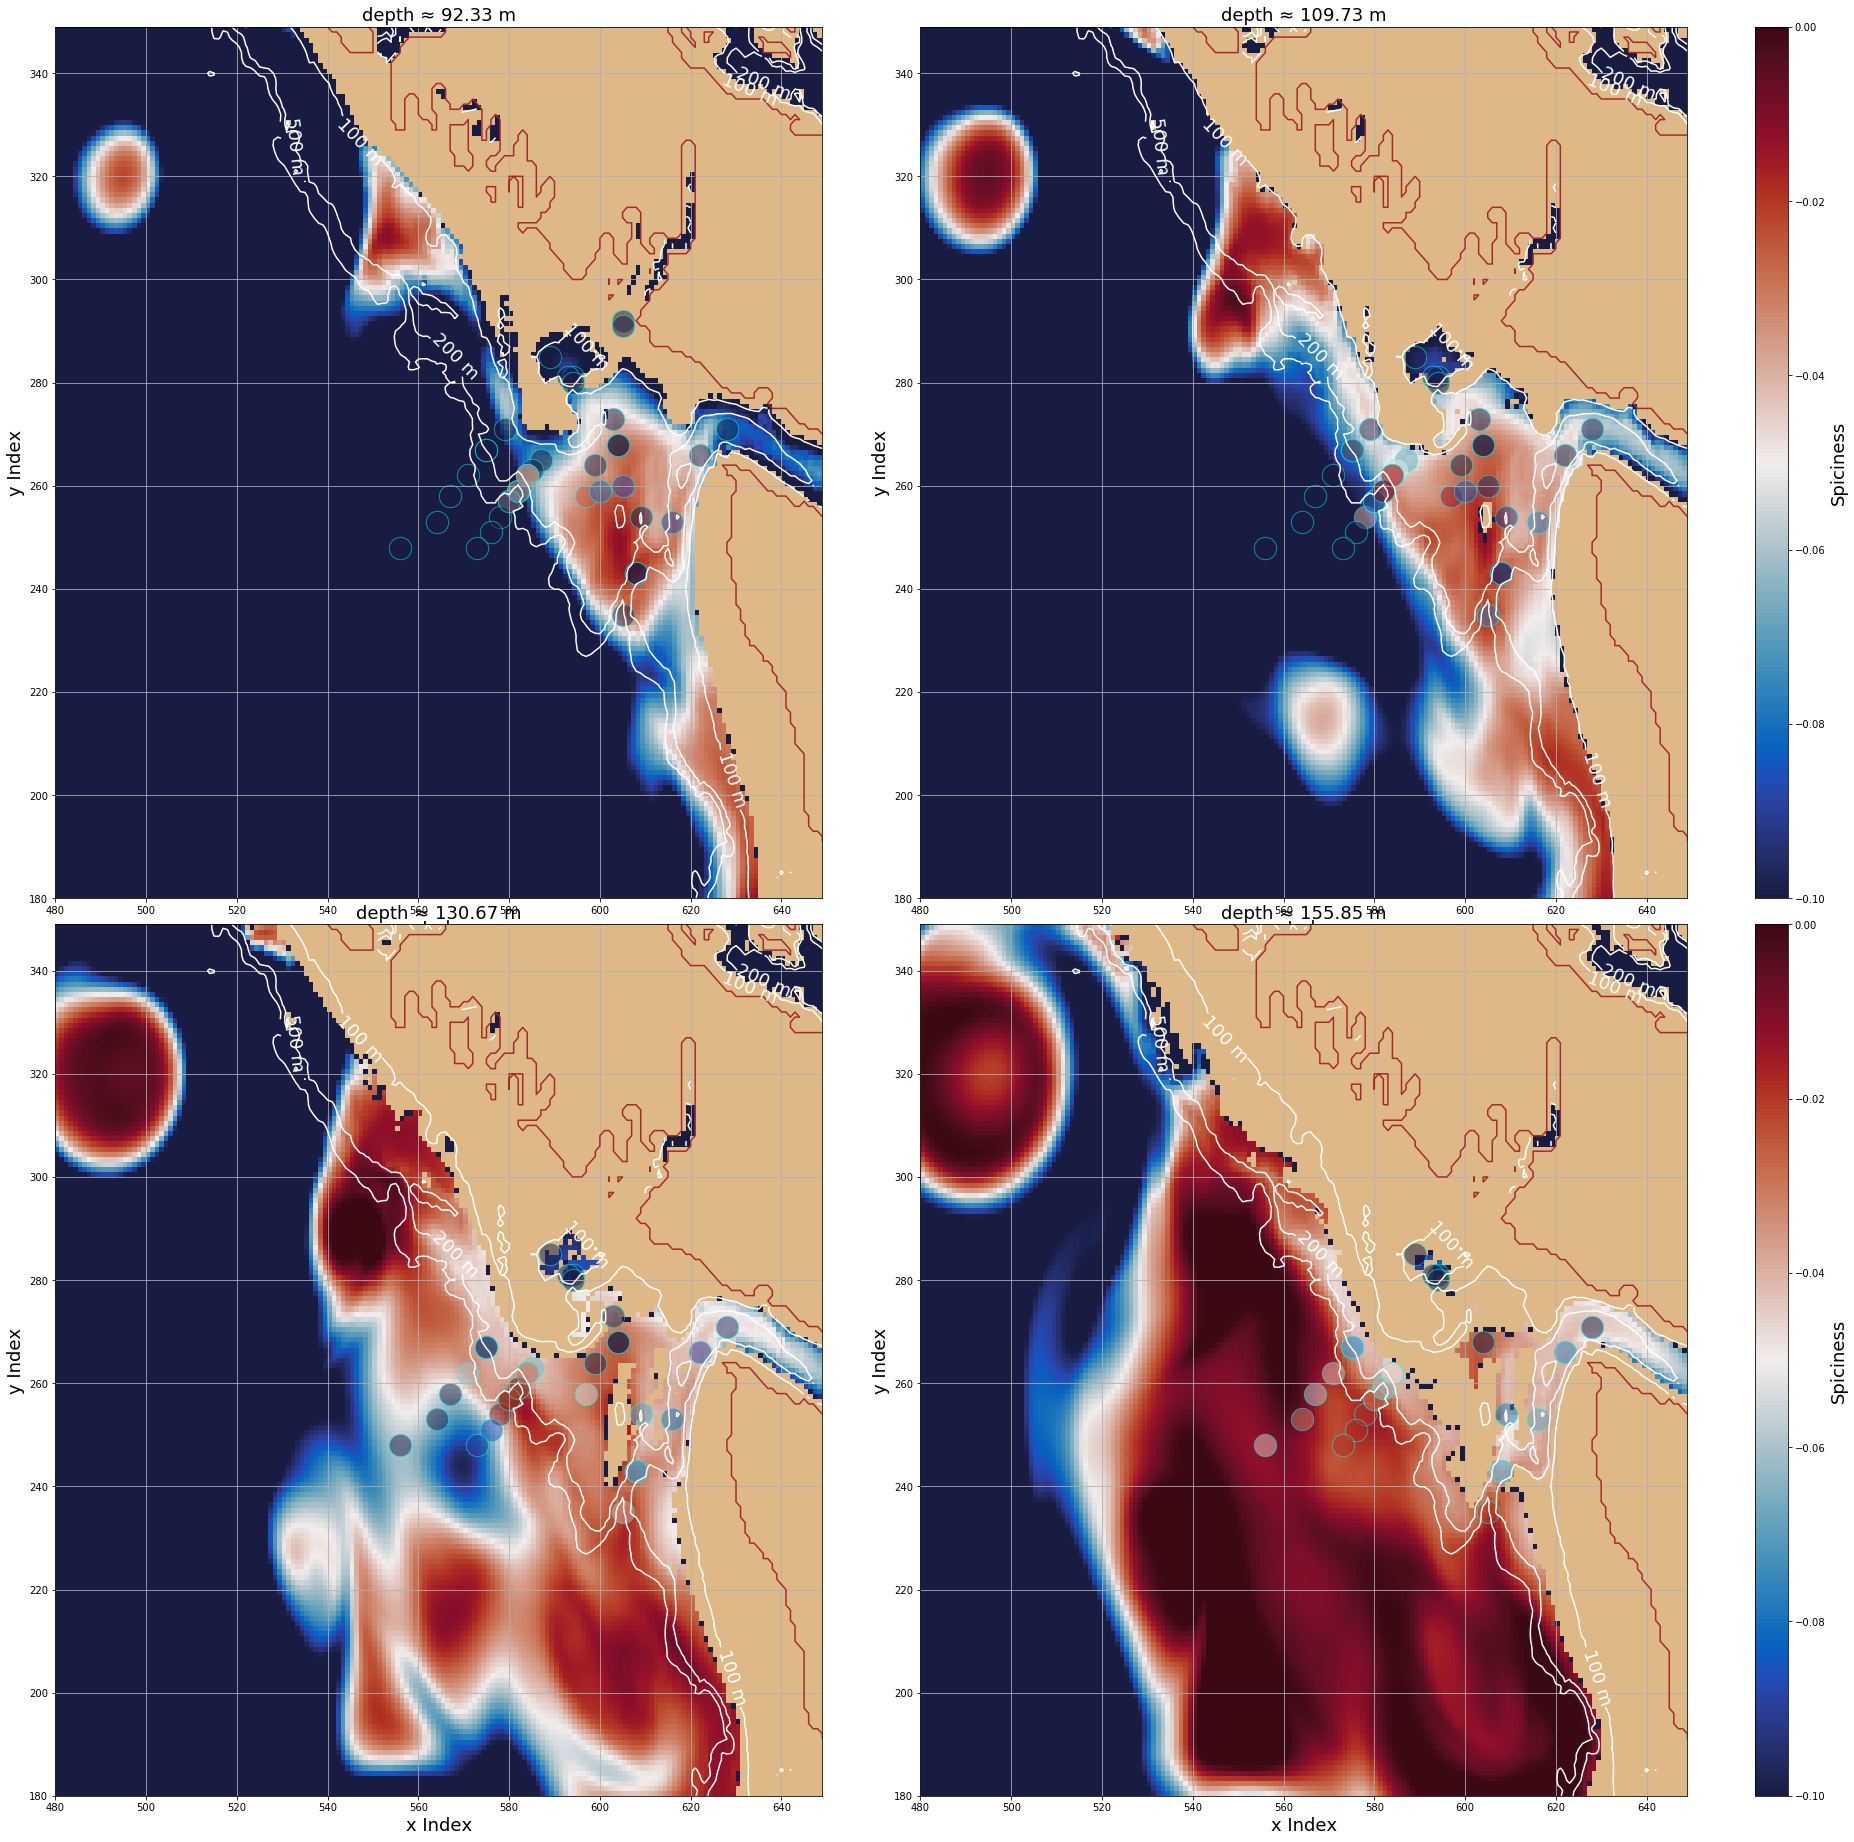

In [65]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 1]})

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

axs[0,0], mesh = plot_spic_subplot(level= 21, ax= axs[0,0], cmin = -0.1, cmax = 0)
axs[0,1], mesh = plot_spic_subplot(level= 22, ax= axs[0,1], cmin = -0.1, cmax = 0)

cbar = fig.colorbar(mesh, cax=axs[0,2])
cbar.set_label(label='Spiciness', fontsize = 18)

axs[1,0], mesh = plot_spic_subplot(level= 23, ax= axs[1,0], cmin = -0.1, cmax = 0)
axs[1,1], mesh = plot_spic_subplot(level= 24, ax= axs[1,1], cmin = -0.1, cmax = 0)

cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label(label='Spiciness', fontsize = 18)

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


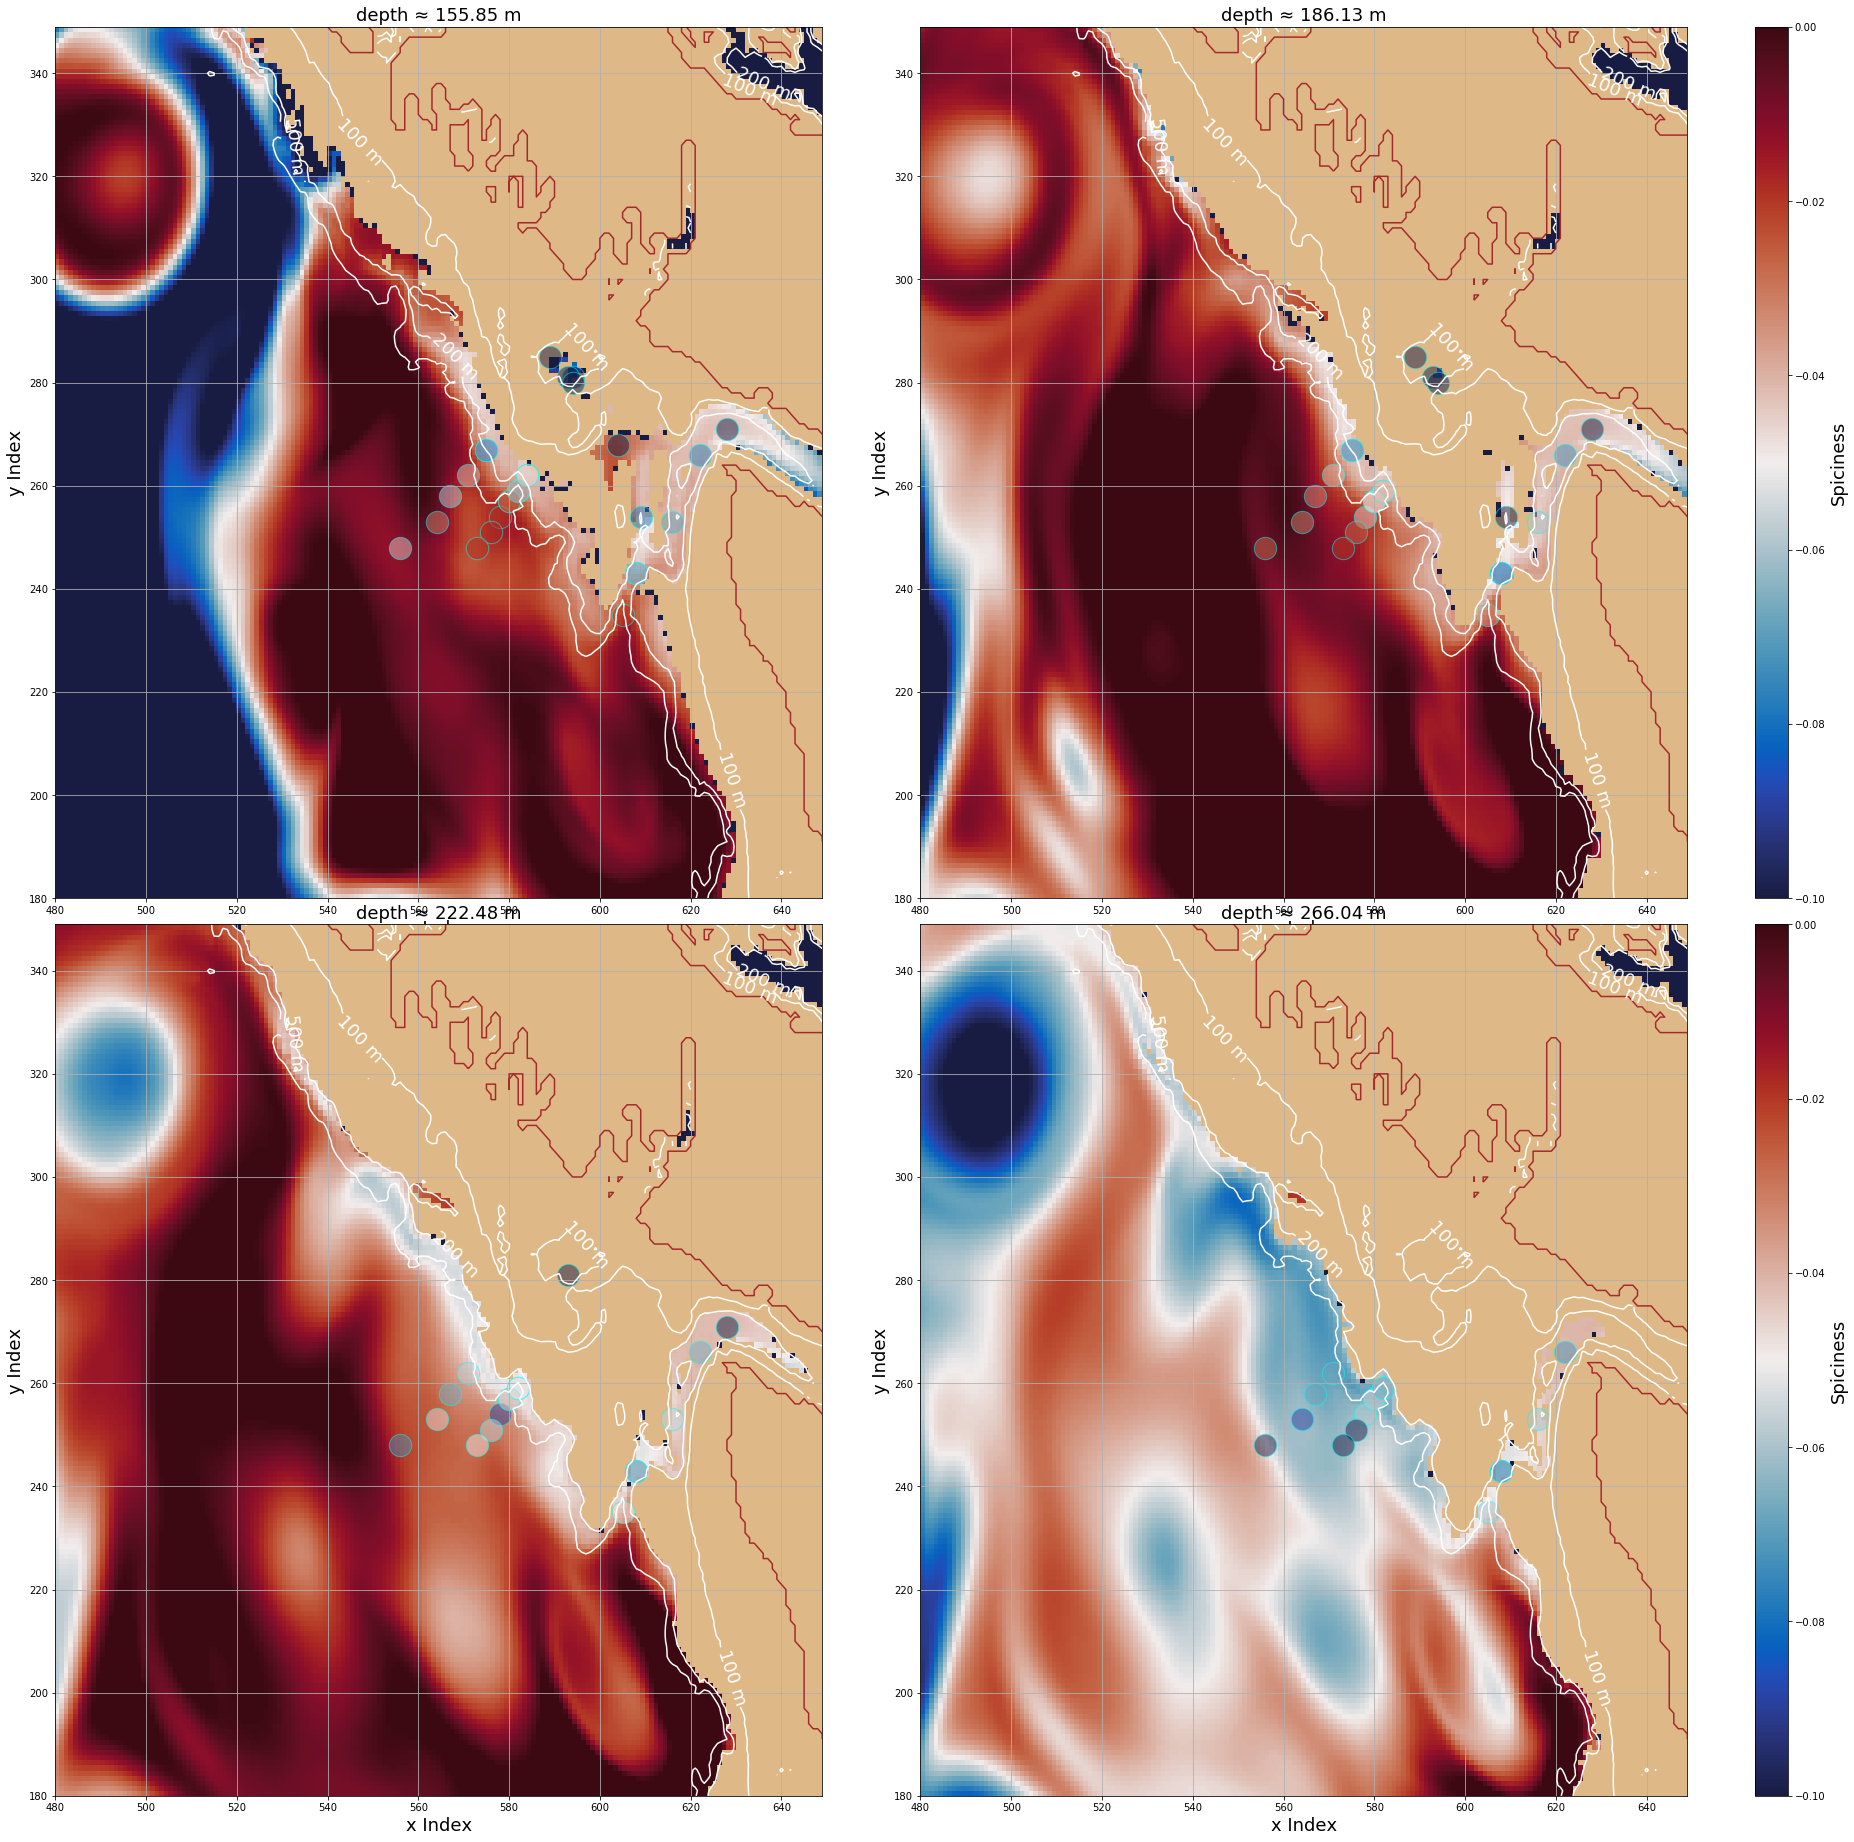

In [66]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 1]})

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

axs[0,0], mesh = plot_spic_subplot(level= 24, ax= axs[0,0], cmin = -0.1, cmax = 0)
axs[0,1], mesh = plot_spic_subplot(level= 25, ax= axs[0,1], cmin = -0.1, cmax = 0)

cbar = fig.colorbar(mesh, cax=axs[0,2])
cbar.set_label(label='Spiciness', fontsize = 18)

axs[1,0], mesh = plot_spic_subplot(level= 26, ax= axs[1,0], cmin = -0.1, cmax = 0)
axs[1,1], mesh = plot_spic_subplot(level= 27, ax= axs[1,1], cmin = -0.1, cmax = 0)

cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label(label='Spiciness', fontsize = 18)

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


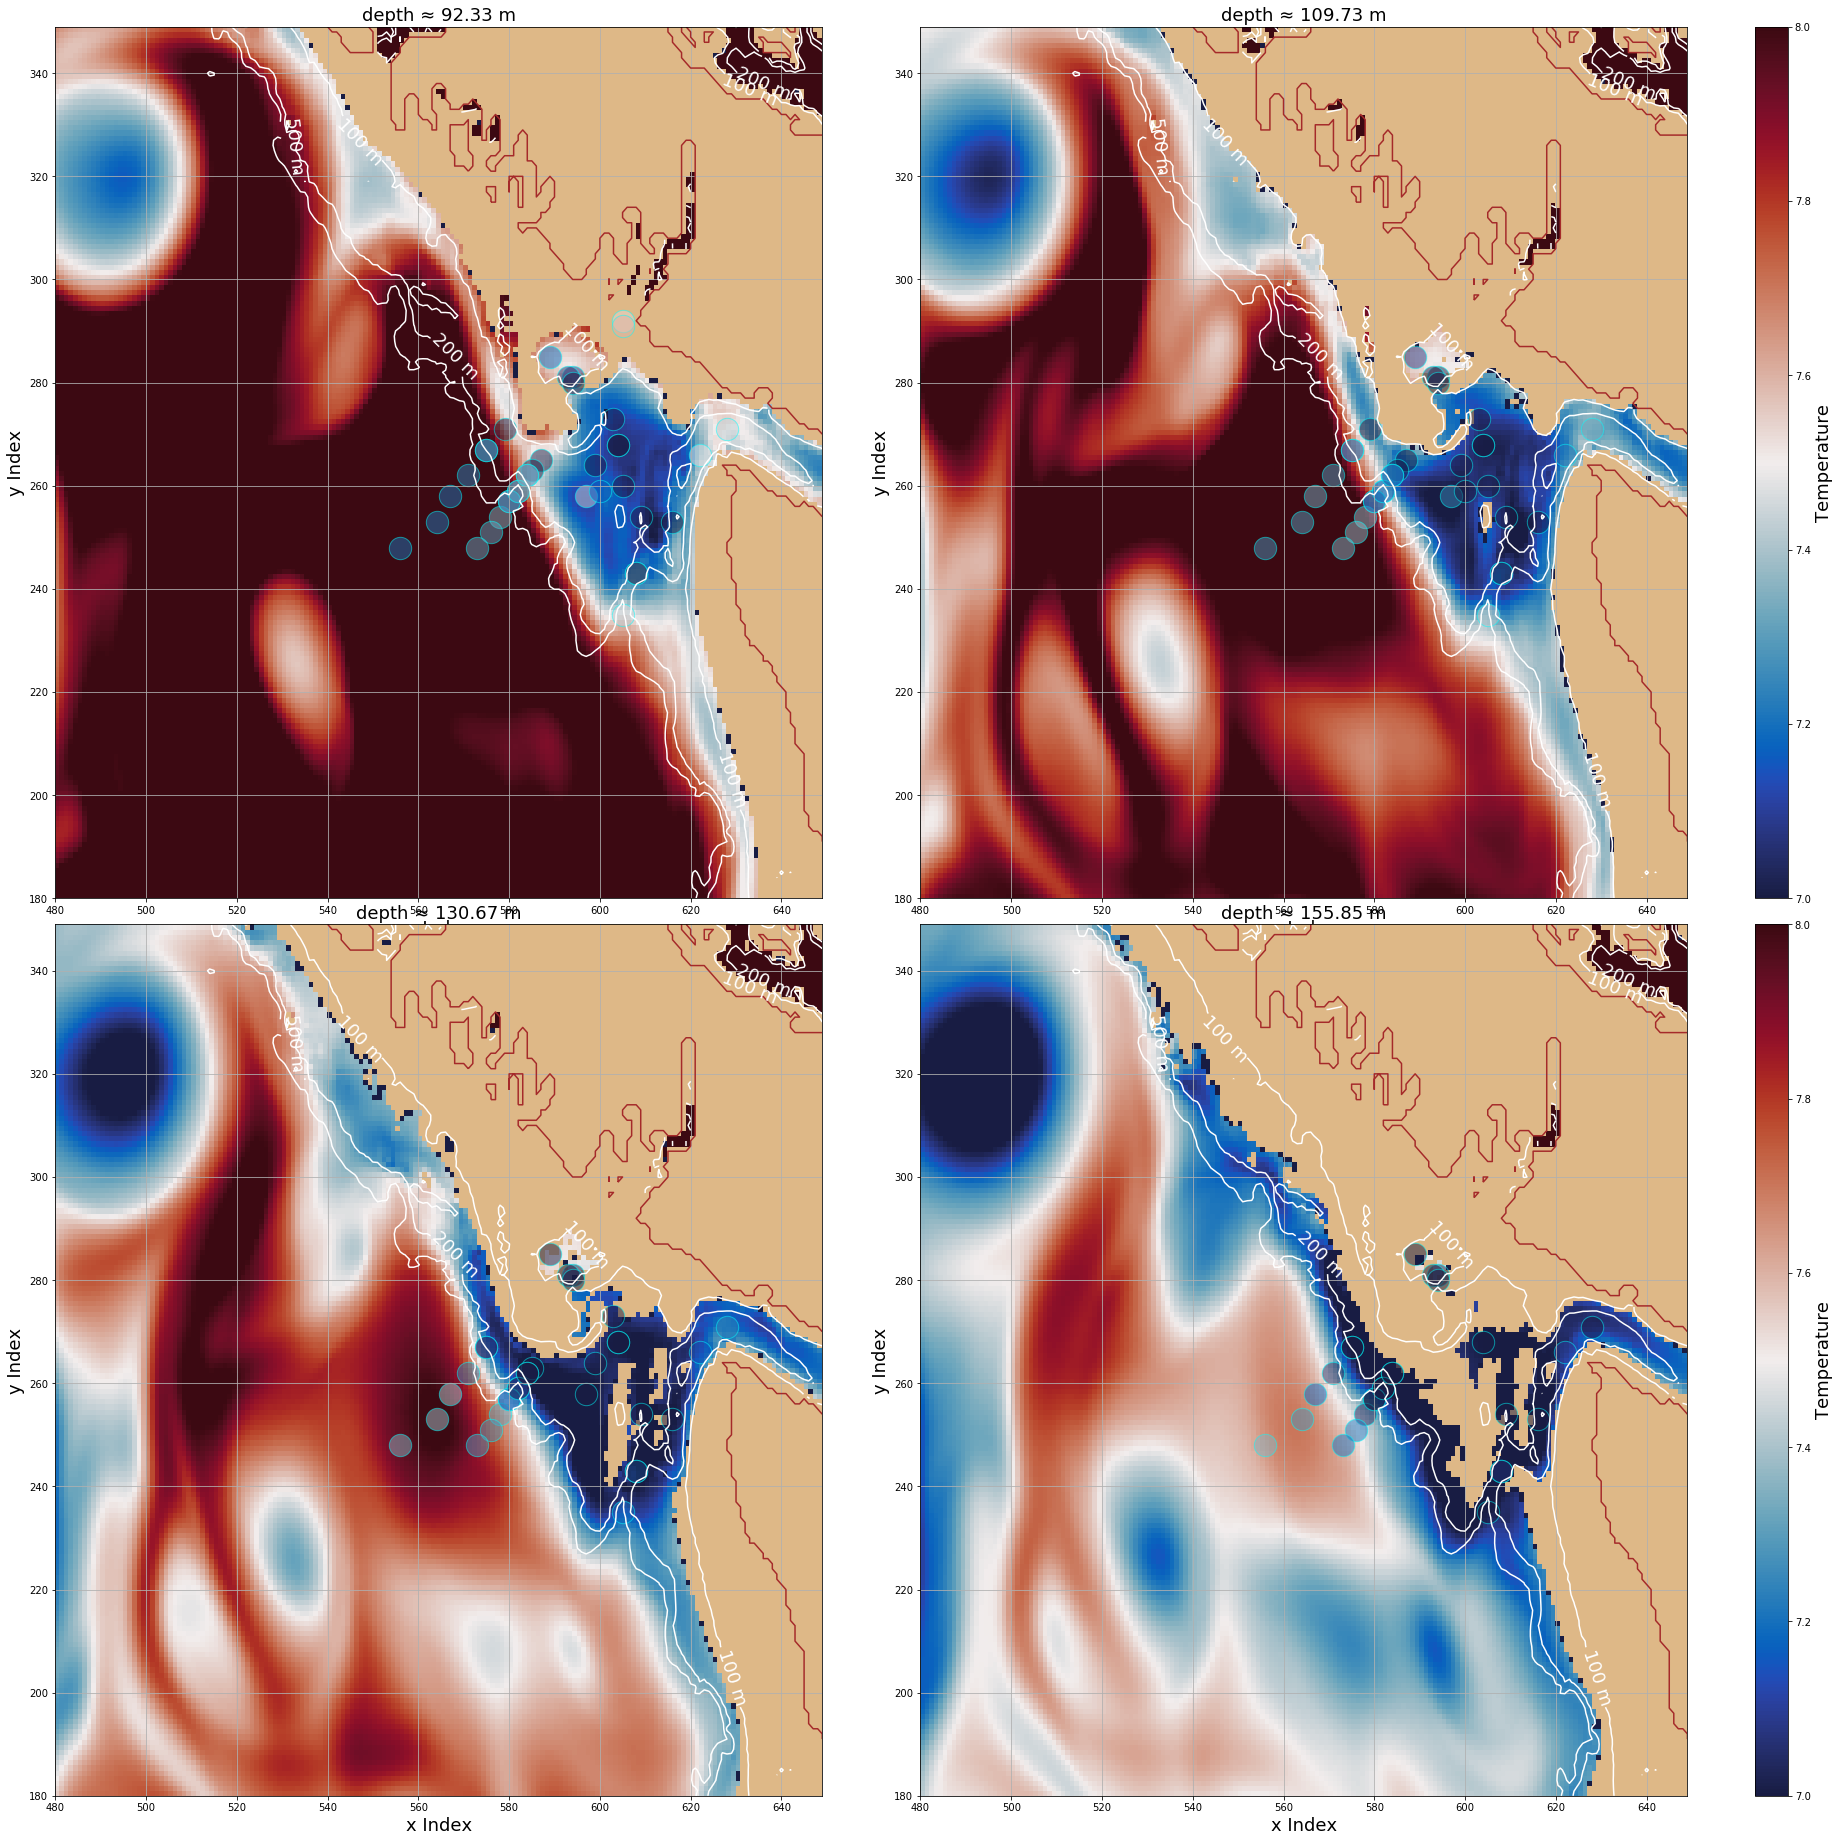

In [67]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 1]})

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

axs[0,0], mesh = plot_temp_subplot(level= 21, ax= axs[0,0], cmin = 7, cmax = 8)
axs[0,1], mesh = plot_temp_subplot(level= 22, ax= axs[0,1], cmin = 7, cmax = 8)

cbar = fig.colorbar(mesh, cax=axs[0,2])
cbar.set_label(label = 'Temperature', fontsize = 18)

axs[1,0], mesh = plot_temp_subplot(level= 23, ax= axs[1,0], cmin = 7, cmax = 8)
axs[1,1], mesh = plot_temp_subplot(level= 24, ax= axs[1,1], cmin = 7, cmax = 8)

cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label(label = 'Temperature', fontsize = 18)


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


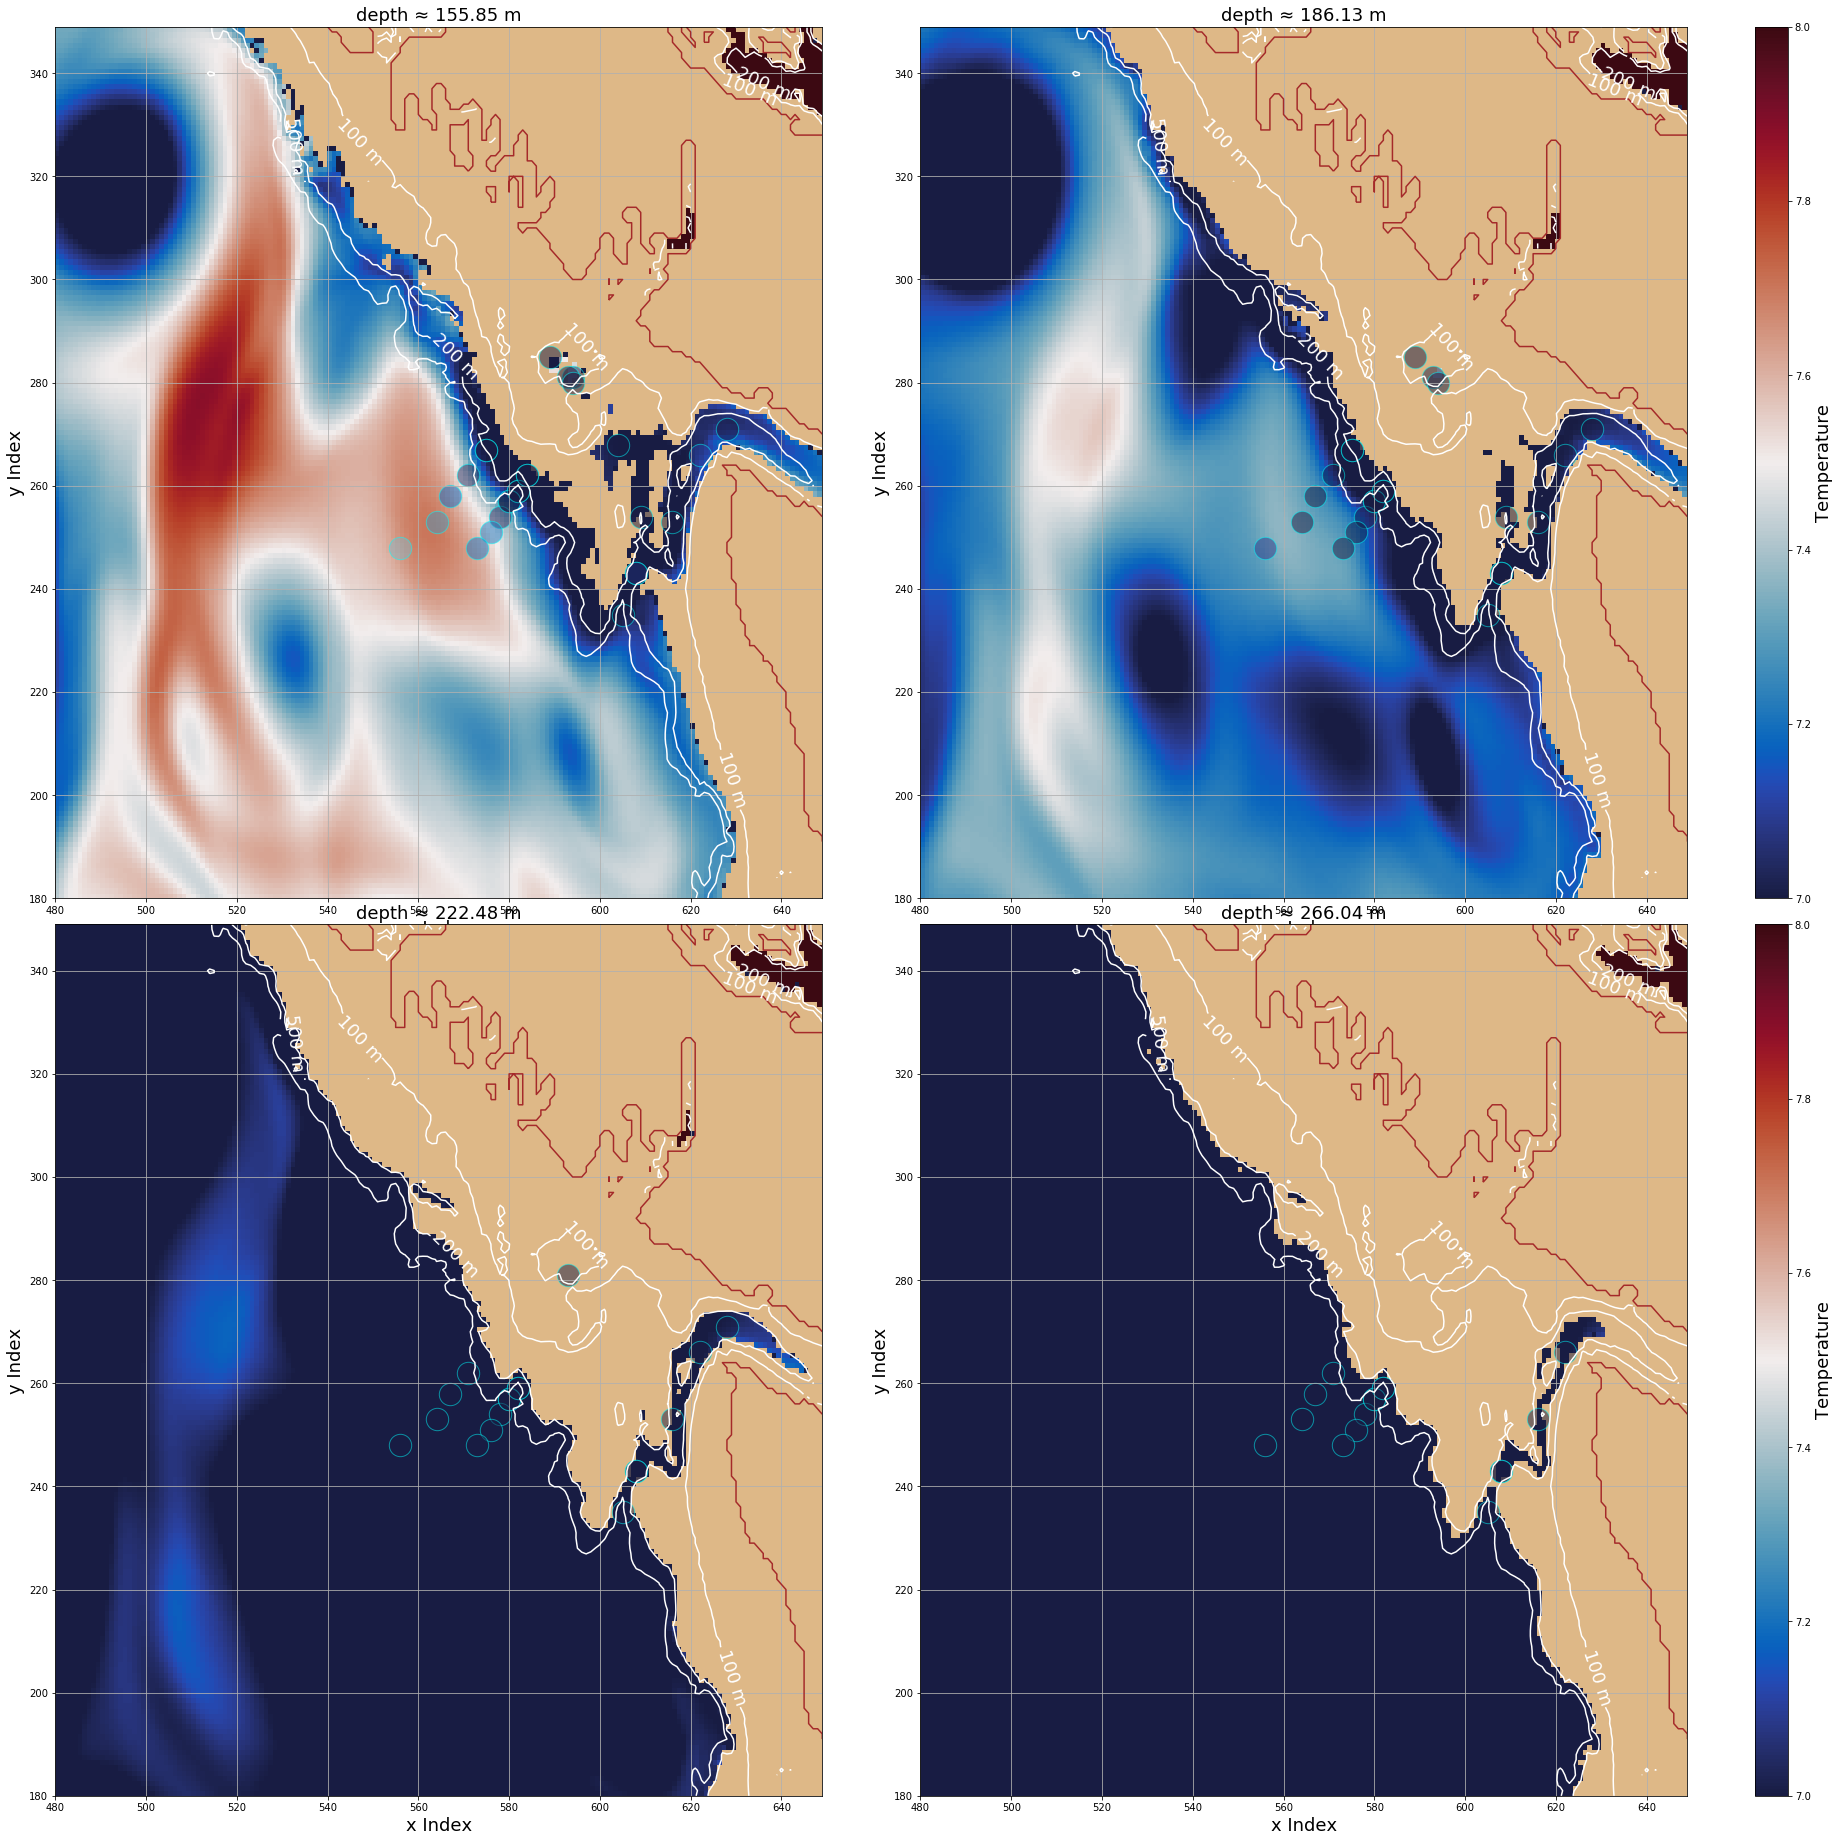

In [68]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 1]})

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

axs[0,0], mesh = plot_temp_subplot(level= 24, ax= axs[0,0], cmin = 7, cmax = 8)
axs[0,1], mesh = plot_temp_subplot(level= 25, ax= axs[0,1], cmin = 7, cmax = 8)

cbar = fig.colorbar(mesh, cax=axs[0,2])
cbar.set_label(label = 'Temperature', fontsize = 18)

axs[1,0], mesh = plot_temp_subplot(level= 26, ax= axs[1,0], cmin = 7, cmax = 8)
axs[1,1], mesh = plot_temp_subplot(level= 27, ax= axs[1,1], cmin = 7, cmax = 8)

cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label(label = 'Temperature', fontsize = 18)


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


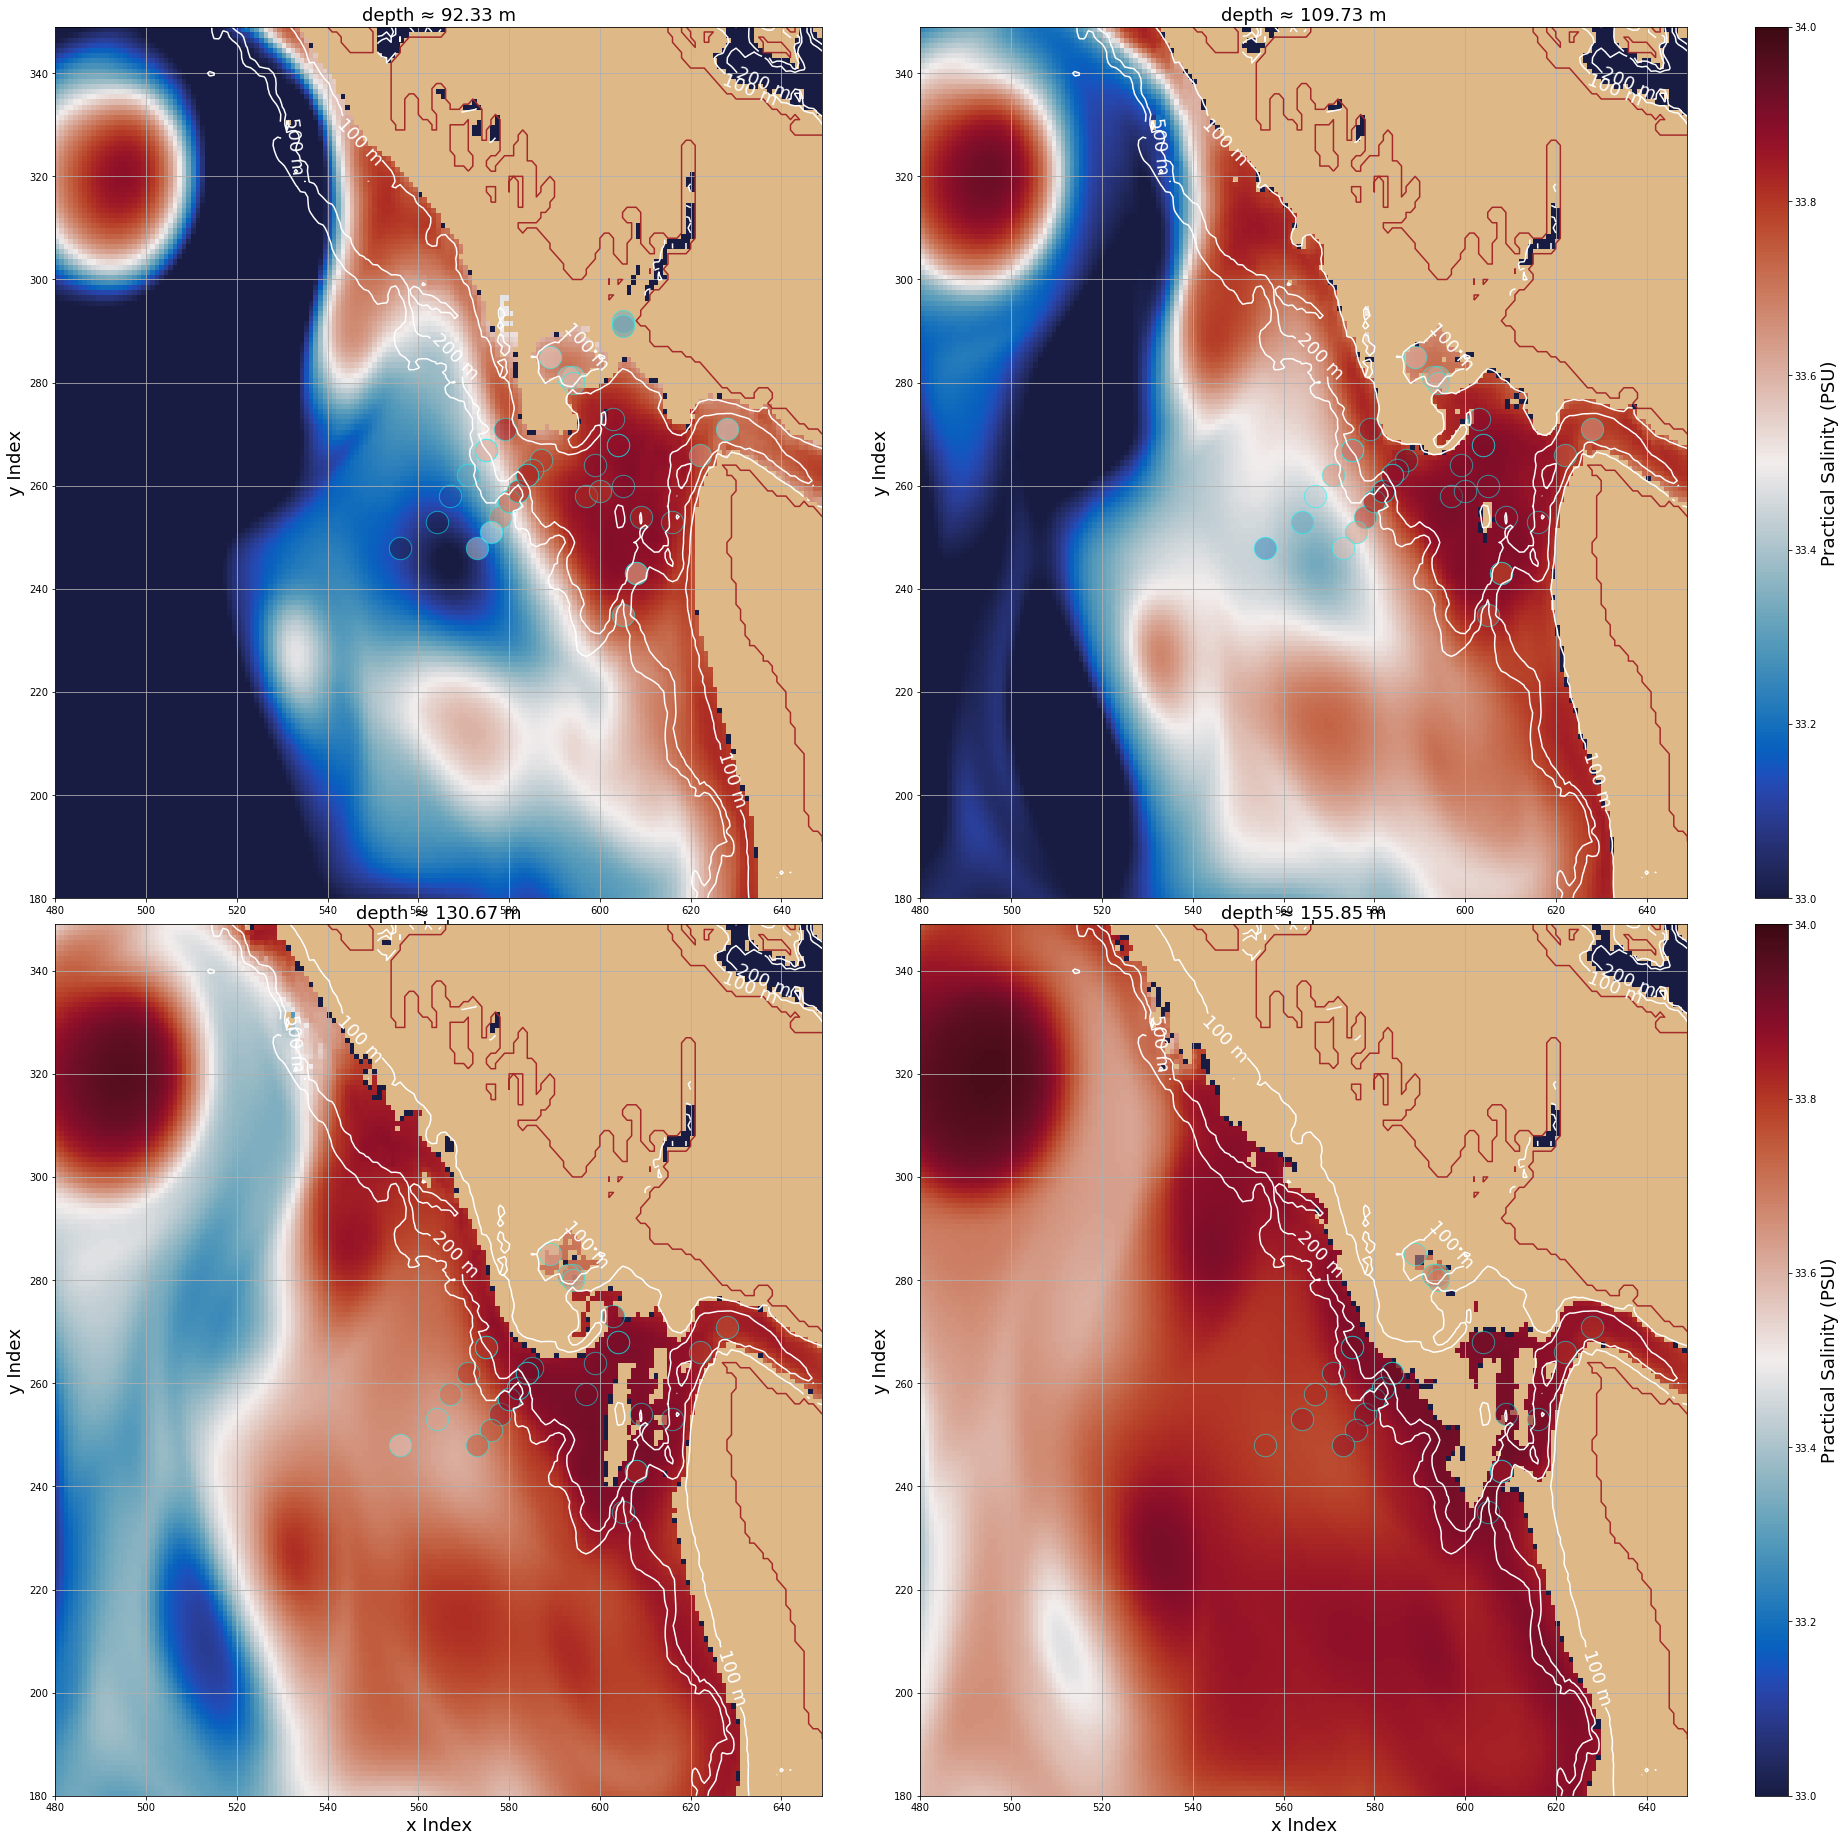

In [69]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 1]})

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

axs[0,0], mesh = plot_sal_subplot(level= 21, ax= axs[0,0], cmin = 33, cmax = 34)
axs[0,1], mesh = plot_sal_subplot(level= 22, ax= axs[0,1], cmin = 33, cmax = 34)

cbar = fig.colorbar(mesh, cax=axs[0,2])
cbar.set_label(label = 'Practical Salinity (PSU)', fontsize = 18)

axs[1,0], mesh = plot_sal_subplot(level= 23, ax= axs[1,0], cmin = 33, cmax = 34)
axs[1,1], mesh = plot_sal_subplot(level= 24, ax= axs[1,1], cmin = 33, cmax = 34)

cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label(label = 'Practical Salinity (PSU)', fontsize = 18)


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


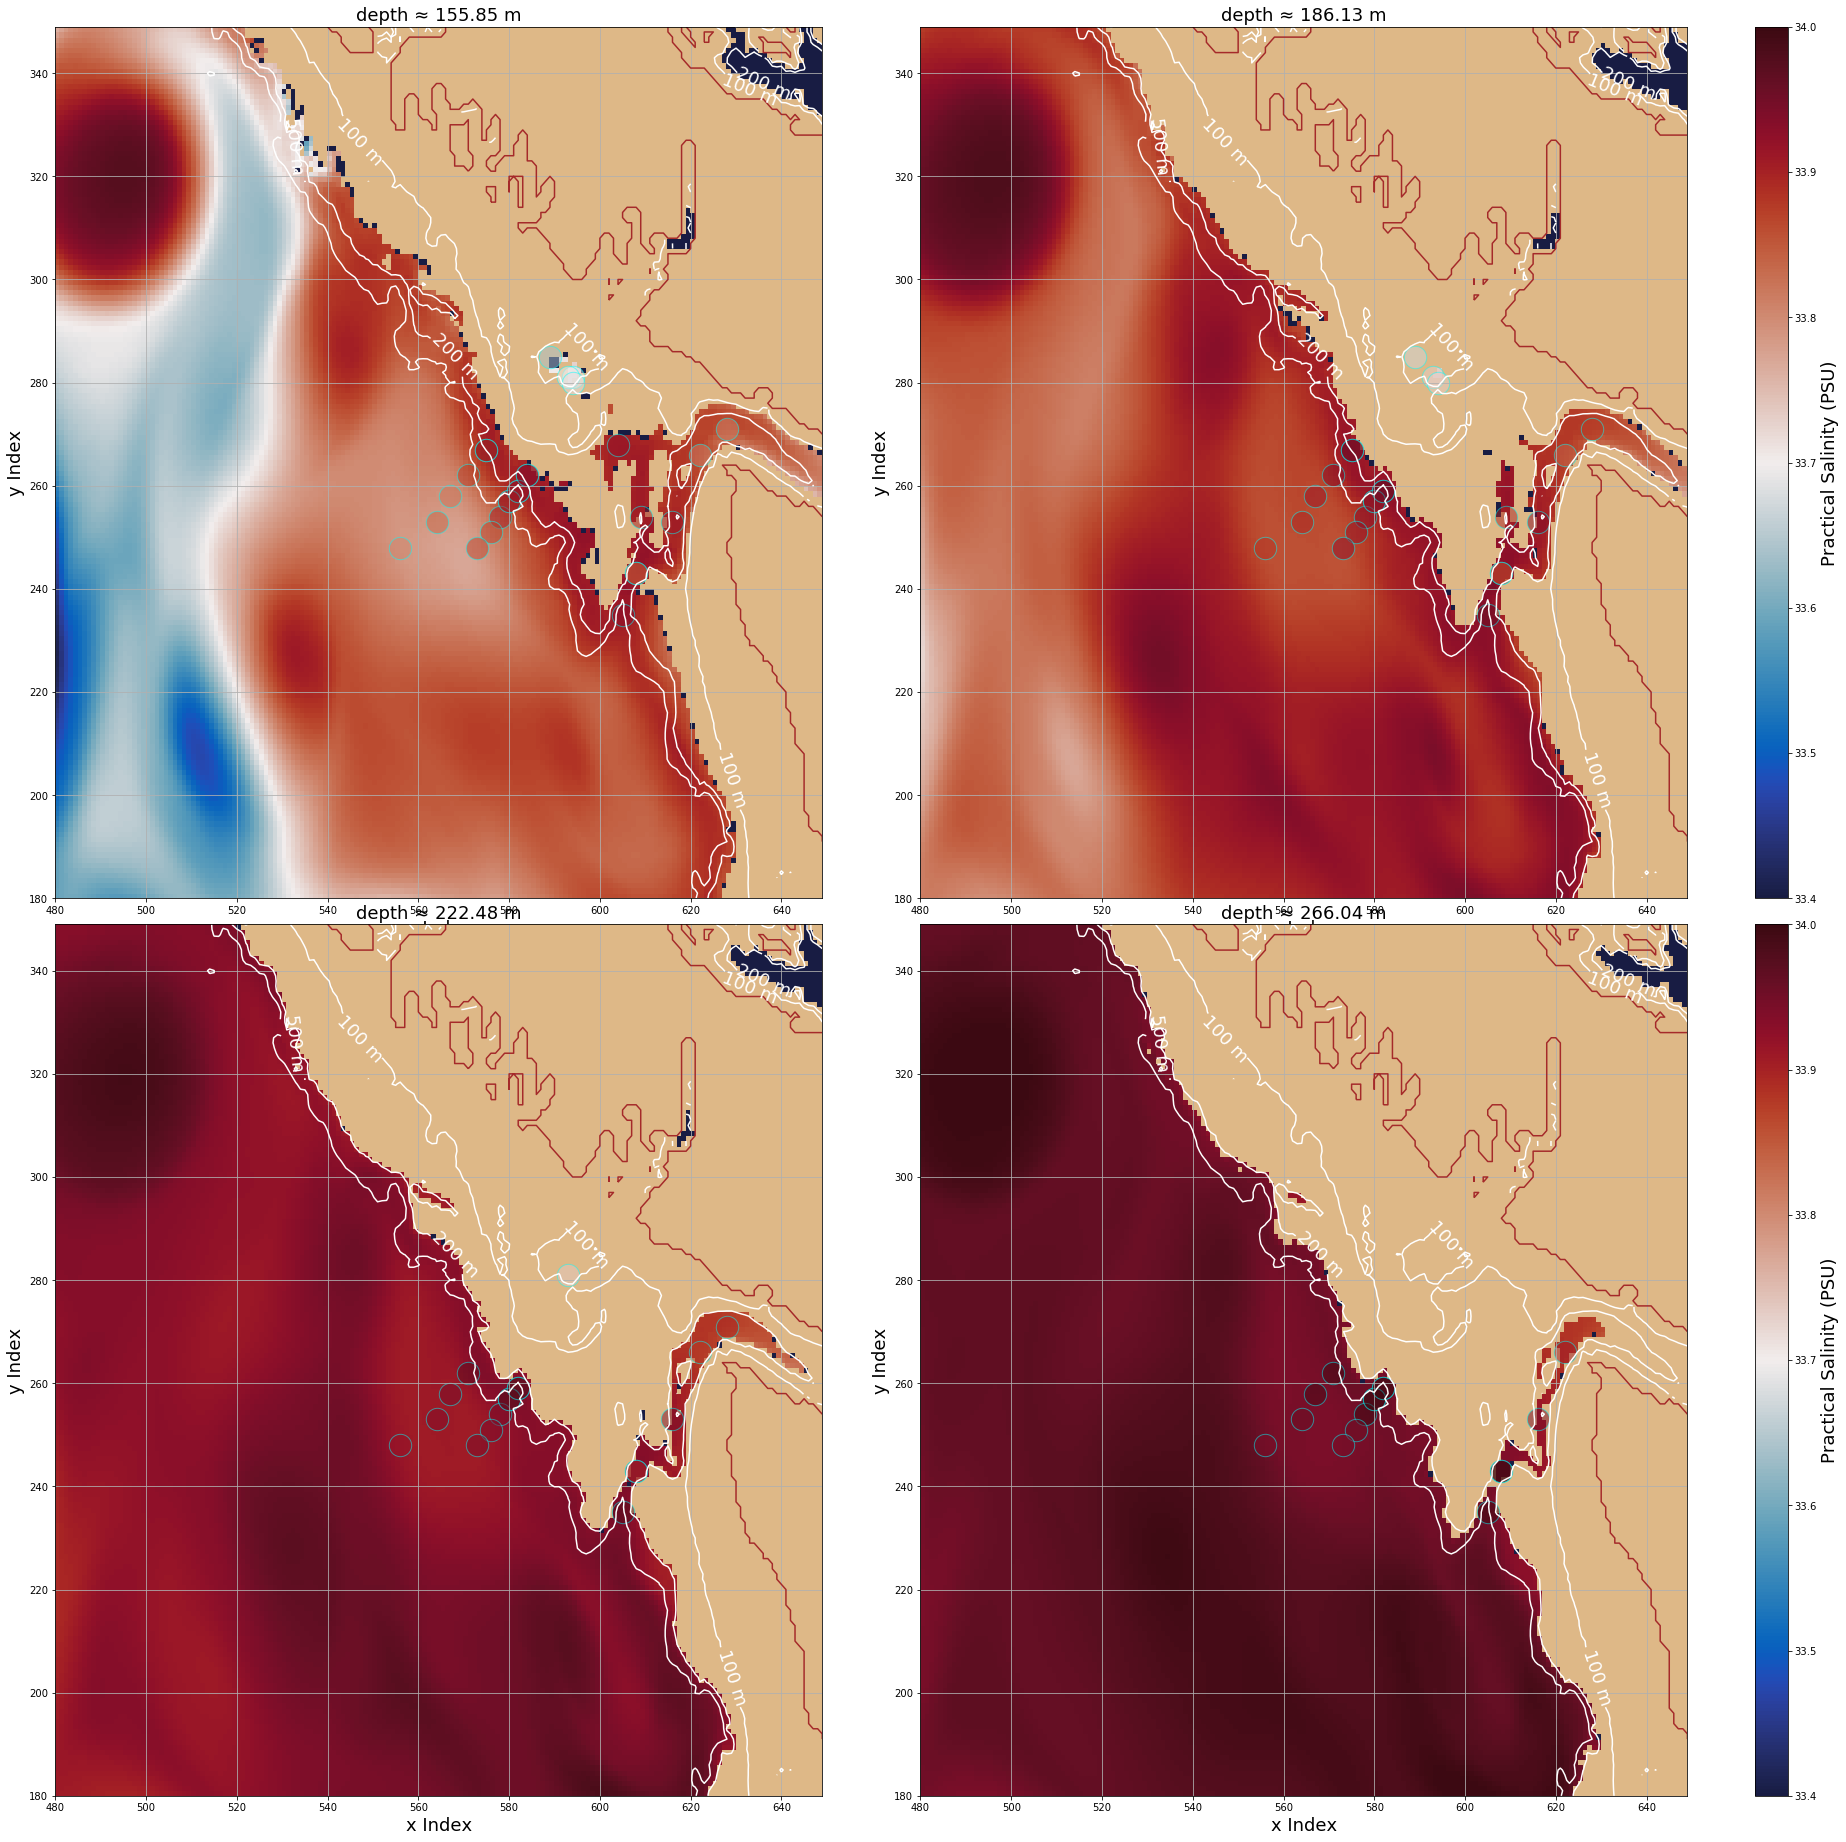

In [70]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 1]})

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)

axs[0,0], mesh = plot_sal_subplot(level= 24, ax= axs[0,0], cmin = 33.4, cmax = 34)
axs[0,1], mesh = plot_sal_subplot(level= 25, ax= axs[0,1], cmin = 33.4, cmax = 34)

cbar = fig.colorbar(mesh, cax=axs[0,2])
cbar.set_label(label = 'Practical Salinity (PSU)', fontsize = 18)

axs[1,0], mesh = plot_sal_subplot(level= 26, ax= axs[1,0], cmin = 33.4, cmax = 34)
axs[1,1], mesh = plot_sal_subplot(level= 27, ax= axs[1,1], cmin = 33.4, cmax = 34)

cbar = plt.colorbar(mesh, cax=axs[1,2])
cbar.set_label(label = 'Practical Salinity (PSU)', fontsize = 18)


In [71]:
def add_model_data_to_bin_at_station_locations(file_number, z_bin_1, z_bin_2, z_bin_3,\
                    tem_bin_1, tem_bin_2, tem_bin_3, \
                   sal_bin_1, sal_bin_2, sal_bin_3, \
                   spic_bin_1, spic_bin_2, spic_bin_3):
    
    t = time_location[file_number]
    j = n[file_number]
    i = m[file_number]
        
    model_temp_ini = temp[t,:mbathy[j,i],j,i]
    model_temp = model_temp_ini[np.nonzero(model_temp_ini)]
#     model_temp = np.ma.masked_array(model_temp_ini, mask= 1- tmask[:mbathy[j,i],j,i])

    model_sal_ini = sal[t,:mbathy[j,i],j,i]
    model_sal = model_sal_ini[np.nonzero(model_sal_ini)]

    model_spice_ini = spic[t,:mbathy[j,i],j,i]
    model_spice = model_spice_ini[np.nonzero(model_sal_ini)]

    

    z_obs = np.array(z_location[file_number])

    
    
    
    func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
    model_temp_interp = func_temp(z_obs)
    
    
    func_sal = interp1d(zlevels[:model_sal.shape[0]], model_sal, fill_value='extrapolate')
    model_sal_interp = func_sal(z_obs)
    
    func_spic = interp1d(zlevels[:model_spice.shape[0]], model_spice, fill_value='extrapolate')
    model_spice_interp = func_spic(z_obs)
    
        
    
    
       
    z_data_bin_1    = z_obs[np.where(z_obs < 60)]

    tem_data_bin_1  = model_temp_interp[np.where(z_obs < 60)]

    sal_data_bin_1  = model_sal_interp[np.where(z_obs < 60)]

    spic_data_bin_1 = model_spice_interp[np.where(z_obs < 60)]
    

    z_data_bin_2    = z_obs[np.where((z_obs >= 60) & (z_obs < 120))]

    tem_data_bin_2  = model_temp_interp[np.where((z_obs >= 60) & (z_obs < 120))]

    sal_data_bin_2  = model_sal_interp[np.where((z_obs >= 60) & (z_obs < 120))]

    spic_data_bin_2 = model_spice_interp[np.where((z_obs >= 60) & (z_obs < 120))]
    

    z_data_bin_3    = z_obs[np.where((z_obs >= 120)& (z_obs <=500))]

    tem_data_bin_3  = model_temp_interp[np.where((z_obs >= 120) & (z_obs <500))]

    sal_data_bin_3  = model_sal_interp[np.where((z_obs >= 120) & (z_obs <500))]

    spic_data_bin_3 = model_spice_interp[np.where((z_obs >= 120) & (z_obs <500))]
    
    
    z_bin_1 = np.append(arr= z_bin_1, values= z_data_bin_1)
    z_bin_2 = np.append(arr= z_bin_2, values= z_data_bin_2)
    z_bin_3 = np.append(arr= z_bin_3, values= z_data_bin_3)
    
    tem_bin_1 = np.append(arr= tem_bin_1, values= tem_data_bin_1)
    tem_bin_2 = np.append(arr= tem_bin_2, values= tem_data_bin_2)
    tem_bin_3 = np.append(arr= tem_bin_3, values= tem_data_bin_3)
    
    sal_bin_1 = np.append(arr= sal_bin_1, values= sal_data_bin_1)
    sal_bin_2 = np.append(arr= sal_bin_2, values= sal_data_bin_2)
    sal_bin_3 = np.append(arr= sal_bin_3, values= sal_data_bin_3)
    
    spic_bin_1 = np.append(arr= spic_bin_1, values= spic_data_bin_1)
    spic_bin_2 = np.append(arr= spic_bin_2, values= spic_data_bin_2)
    spic_bin_3 = np.append(arr= spic_bin_3, values= spic_data_bin_3)
    
    return z_bin_1, z_bin_2, z_bin_3, tem_bin_1, tem_bin_2, tem_bin_3, sal_bin_1, sal_bin_2, sal_bin_3, spic_bin_1, spic_bin_2, spic_bin_3
    

    
    
    
    
    

In [72]:
z_bin_1_m = []
z_bin_2_m = []
z_bin_3_m = []

tem_bin_1_m = []
tem_bin_2_m = []
tem_bin_3_m = []

sal_bin_1_m = []
sal_bin_2_m = []
sal_bin_3_m = []

spic_bin_1_m = []
spic_bin_2_m = []
spic_bin_3_m = []


for file_number in np.arange(1,len(file)-1):
    if file_number!=23:
        z_bin_1_m, z_bin_2_m, z_bin_3_m, \
        tem_bin_1_m, tem_bin_2_m,tem_bin_3_m, \
        sal_bin_1_m, sal_bin_2_m, sal_bin_3_m, \
        spic_bin_1_m, spic_bin_2_m, spic_bin_3_m = add_model_data_to_bin_at_station_locations(file_number, z_bin_1_m, z_bin_2_m, z_bin_3_m,\
                                                             tem_bin_1_m, tem_bin_2_m, tem_bin_3_m, \
                                                             sal_bin_1_m, sal_bin_2_m, sal_bin_3_m, \
                                                             spic_bin_1_m, spic_bin_2_m, spic_bin_3_m)
    


In [73]:
def add_data_to_bin(file_number, z_bin_1, z_bin_2, z_bin_3,\
                    tem_bin_1, tem_bin_2, tem_bin_3, \
                   sal_bin_1, sal_bin_2, sal_bin_3, \
                   spic_bin_1, spic_bin_2, spic_bin_3):
    



    z_data = z_location[file_number]

    tem_data = temp_location[file_number]

    sal_data = sal_location[file_number]

    spic_data = spic_falk_loc[file_number]
    
       
    z_data_bin_1    = z_data[np.where(z_data < 60)]

    tem_data_bin_1  = tem_data[np.where(z_data < 60)]

    sal_data_bin_1  = sal_data[np.where(z_data < 60)]

    spic_data_bin_1 = spic_data[np.where(z_data < 60)]
    

    z_data_bin_2    = z_data[np.where((z_data >= 60) & (z_data < 120))]

    tem_data_bin_2  = tem_data[np.where((z_data >= 60) & (z_data < 120))]

    sal_data_bin_2  = sal_data[np.where((z_data >= 60) & (z_data < 120))]

    spic_data_bin_2 = spic_data[np.where((z_data >= 60) & (z_data < 120))]
    

    z_data_bin_3    = z_data[np.where((z_data >= 120) & (z_data <500))]

    tem_data_bin_3  = tem_data[np.where((z_data >= 120)& (z_data <500))]

    sal_data_bin_3  = sal_data[np.where((z_data >= 120)& (z_data <500))]

    spic_data_bin_3 = spic_data[np.where((z_data >= 120)& (z_data <500))]
    
    
    z_bin_1 = np.append(arr= z_bin_1, values= z_data_bin_1)
    z_bin_2 = np.append(arr= z_bin_2, values= z_data_bin_2)
    z_bin_3 = np.append(arr= z_bin_3, values= z_data_bin_3)
    
    tem_bin_1 = np.append(arr= tem_bin_1, values= tem_data_bin_1)
    tem_bin_2 = np.append(arr= tem_bin_2, values= tem_data_bin_2)
    tem_bin_3 = np.append(arr= tem_bin_3, values= tem_data_bin_3)
    
    sal_bin_1 = np.append(arr= sal_bin_1, values= sal_data_bin_1)
    sal_bin_2 = np.append(arr= sal_bin_2, values= sal_data_bin_2)
    sal_bin_3 = np.append(arr= sal_bin_3, values= sal_data_bin_3)
    
    spic_bin_1 = np.append(arr= spic_bin_1, values= spic_data_bin_1)
    spic_bin_2 = np.append(arr= spic_bin_2, values= spic_data_bin_2)
    spic_bin_3 = np.append(arr= spic_bin_3, values= spic_data_bin_3)
    
    return z_bin_1, z_bin_2, z_bin_3, tem_bin_1, tem_bin_2, tem_bin_3, sal_bin_1, sal_bin_2, sal_bin_3, spic_bin_1, spic_bin_2, spic_bin_3
    

    
    
    
    
    

In [74]:
z_bin_1 = []
z_bin_2 = []
z_bin_3 = []

tem_bin_1 = []
tem_bin_2 = []
tem_bin_3 = []

sal_bin_1 = []
sal_bin_2 = []
sal_bin_3 = []

spic_bin_1 = []
spic_bin_2 = []
spic_bin_3 = []


for file_number in np.arange(1,len(file)-1):
    if file_number!=23:
        z_bin_1, z_bin_2, z_bin_3, \
        tem_bin_1, tem_bin_2,tem_bin_3, \
        sal_bin_1, sal_bin_2, sal_bin_3, \
        spic_bin_1, spic_bin_2, spic_bin_3 = add_data_to_bin(file_number, z_bin_1, z_bin_2, z_bin_3,\
                                                             tem_bin_1, tem_bin_2, tem_bin_3, \
                                                             sal_bin_1, sal_bin_2, sal_bin_3, \
                                                             spic_bin_1, spic_bin_2, spic_bin_3)


In [75]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):

        self.sg.fig.set_size_inches(self.fig.get_size_inches())

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [78]:
def get_stat_tem(obs_temp, model_temp, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_temp

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws

def get_stat_sal(obs_sal, model_sal, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_sal
    obs_temp = obs_sal

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws


def get_stat_spice(obs_spice, model_spice, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_spice
    obs_temp = obs_spice

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws




def plot_stat_bin(bin_number):
    if bin_number == 'bin1':
        obs_temp    = tem_bin_1 
        model_temp  = tem_bin_1_m
        obs_sal     = sal_bin_1
        model_sal   = sal_bin_1_m
        obs_spice   = spic_bin_1
        model_spice = spic_bin_1_m 
        z_data      = z_bin_1
        
    if bin_number == 'bin2':
        obs_temp    = tem_bin_2 
        model_temp  = tem_bin_2_m
        obs_sal     = sal_bin_2
        model_sal   = sal_bin_2_m
        obs_spice   = spic_bin_2
        model_spice = spic_bin_2_m 
        z_data      = z_bin_2
        
    if bin_number == 'bin3':
        obs_temp    = tem_bin_3 
        model_temp  = tem_bin_3_m
        obs_sal     = sal_bin_3
        model_sal   = sal_bin_3_m
        obs_spice   = spic_bin_3
        model_spice = spic_bin_3_m 
        z_data      = z_bin_3
        
    df =pd.DataFrame()
    df['Observed_temp'] = obs_temp
    df['Model_temp'] = model_temp
    df['Observed_Salinity'] = obs_sal
    df['Model_Salinity'] = model_sal
    df['Observed_Spice'] = obs_spice
    df['Model_Spice'] = model_spice
    
    if bin_number == 'bin1':
        df["Depth (m)"] = z_bin_1
        
    if bin_number == 'bin2':
        df["Depth (m)"] = z_bin_2
        
    if bin_number == 'bin3':
        df["Depth (m)"] = z_bin_3
        
    sns.set(style="white")
#     plt.figure(figsize=(60,60))
    p = sns.relplot(x="Observed_temp", y="Model_temp", hue="Depth (m)",  sizes=(1,10),data=df,palette=cm.plasma_r)
    q = sns.relplot(x="Observed_Salinity", y="Model_Salinity", hue="Depth (m)",  sizes=(40, 400),data=df, palette=cm.RdBu)#, palette=cmap)
    g = sns.relplot(x='Observed_Spice', y='Model_Spice', hue="Depth (m)",  sizes=(40, 400),data=df, palette=cm.plasma_r)#, palette=cmap)
    leg = p.axes[0, 0].get_legend()
    p.axes[0,0].legend(loc="best")
    leg = q.axes[0, 0].get_legend()
    q.axes[0,0].legend(loc="best")
    # leg.set_title(Depth)
    # labs = leg.texts
    # labs[0].set_text("(50-75)m")
    # labs[1].set_text("(75 - 100)m")
    lims = [
        np.min([p.axes[0,0].get_xlim(), p.axes[0,0].get_ylim()]),  # min of both axes
        np.max([p.axes[0,0].get_xlim(), p.axes[0,0].get_ylim()]),  # max of both axes
    ]

    p.axes[0,0].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    gamma2,rms_error,ws = get_stat_tem(obs_temp, model_temp, z_data)
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=8), loc=3, frameon=True,
                           bbox_to_anchor=(0., 1.),
                           bbox_transform=p.axes[0,0].transAxes
                           )
    p.axes[0,0].add_artist(anchored_text)

    lims = [
        np.min([q.axes[0,0].get_xlim(), q.axes[0,0].get_ylim()]),  # min of both axes
        np.max([q.axes[0,0].get_xlim(), q.axes[0,0].get_ylim()]),  # max of both axes
    ]

    q.axes[0,0].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    gamma2,rms_error,ws = get_stat_sal(obs_sal, model_sal, z_data)
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=8), loc=3, frameon=True,
                           bbox_to_anchor=(0., 1.),
                           bbox_transform=q.axes[0,0].transAxes
                           )
    q.axes[0,0].add_artist(anchored_text)

    lims = [
        np.min([g.axes[0,0].get_xlim(), g.axes[0,0].get_ylim()]),  # min of both axes
        np.max([g.axes[0,0].get_xlim(), g.axes[0,0].get_ylim()]),  # max of both axes
    ]

    g.axes[0,0].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    gamma2,rms_error,ws = get_stat_spice(obs_spice, model_spice, z_data)
    anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=8), loc=3, frameon=True,
                           bbox_to_anchor=(0., 1.),
                           bbox_transform=g.axes[0,0].transAxes
                           )
    g.axes[0,0].add_artist(anchored_text)
    # labs[2].set_text("Type 2")
    # labs[3].set_text("Type 3")

    # fig, axs = plt.subplots(1, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 25]})

    # fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 3)
    mg0 = SeabornFig2Grid(p, fig, gs[0])
    mg1 = SeabornFig2Grid(q, fig, gs[1])
    mg2 = SeabornFig2Grid(g, fig, gs[2])

    # mg3 = SeabornFig2Grid(p, fig, gs[3])

    # plt.show()
    gs.tight_layout(fig)




Model vs Observed (0 to 50m)


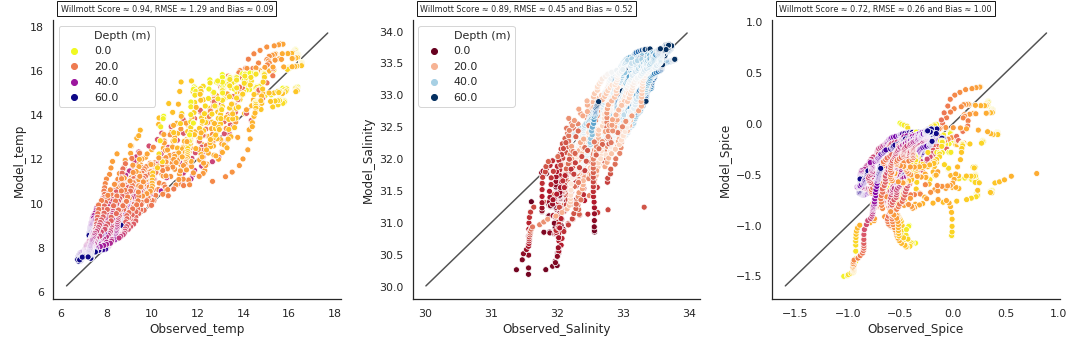

In [81]:
print("Model vs Observed (0 to 50m)")
plot_stat_bin('bin1')

Model vs Observed for Bin 2 (60m to 120m)


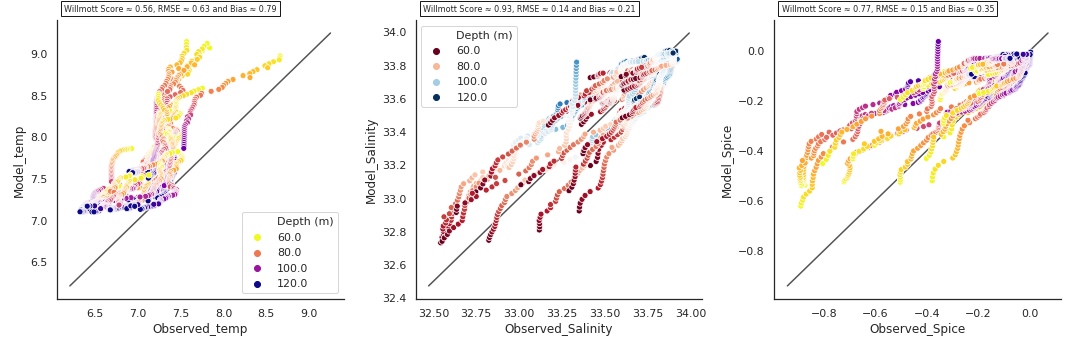

In [82]:
print('Model vs Observed for Bin 2 (60m to 120m)')
plot_stat_bin('bin2')

Model vs Observed (120m to 500m)


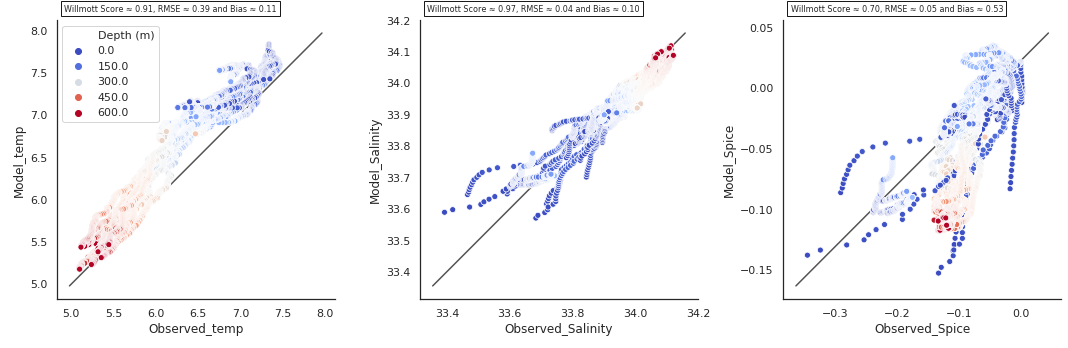

In [83]:
print("Model vs Observed (120m to 500m)")

df =pd.DataFrame()
df['Observed_temp'] = tem_bin_3
df['Model_temp'] = tem_bin_3_m
df['Observed_Salinity'] = sal_bin_3
df['Model_Salinity'] = sal_bin_3_m
df['Observed_Spice'] = spic_bin_3
df['Model_Spice'] = spic_bin_3_m


# Depths = np.empty_like(z_bin_2)
# Depths[np.where((75>z_bin_2) & (z_bin_2>=50))] = 0
# Depths[np.where((100>z_bin_2) & (z_bin_2>=75))] = 1 
# df['Z'] = Depths

df["Depth (m)"] = z_bin_3[:]

p = sns.relplot(x="Observed_temp", y="Model_temp", hue="Depth (m)",  sizes=(1,10),data=df, legend='brief',palette=cm.coolwarm)
q = sns.relplot(x="Observed_Salinity", y="Model_Salinity", hue="Depth (m)",  sizes=(40, 400),data=df, palette=cm.coolwarm)#, palette=cmap)
g = sns.relplot(x='Observed_Spice', y='Model_Spice', hue="Depth (m)",  sizes=(40, 400),data=df, palette=cm.coolwarm)#, palette=cmap)
leg = p.axes[0, 0].get_legend()
p.axes[0,0].legend(loc="best")

lims = [
    np.min([p.axes[0,0].get_xlim(), p.axes[0,0].get_ylim()]),  # min of both axes
    np.max([p.axes[0,0].get_xlim(), p.axes[0,0].get_ylim()]),  # max of both axes
]

p.axes[0,0].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_tem(tem_bin_3, tem_bin_3_m, z_bin_3)
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=8), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=p.axes[0,0].transAxes
                       )
p.axes[0,0].add_artist(anchored_text)

lims = [
    np.min([q.axes[0,0].get_xlim(), q.axes[0,0].get_ylim()]),  # min of both axes
    np.max([q.axes[0,0].get_xlim(), q.axes[0,0].get_ylim()]),  # max of both axes
]

q.axes[0,0].plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_sal(sal_bin_3, sal_bin_3_m, z_bin_3)
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=8), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=q.axes[0,0].transAxes
                       )
q.axes[0,0].add_artist(anchored_text)

lims = [
    np.min([g.axes[0,0].get_xlim(), g.axes[0,0].get_ylim()]),  # min of both axes
    np.max([g.axes[0,0].get_xlim(), g.axes[0,0].get_ylim()]),  # max of both axes
]

lims3 = [
    np.min([g.axes[0,0].get_ylim(), g.axes[0,0].get_ylim()]),  # min of both axes
    np.max([g.axes[0,0].get_xlim(), g.axes[0,0].get_ylim()]),  # max of both axes
]


g.axes[0,0].plot(lims, lims3, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_spice(spic_bin_3, spic_bin_3_m, z_bin_3)
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=8), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=g.axes[0,0].transAxes
                       )
g.axes[0,0].add_artist(anchored_text)
# labs[2].set_text("Type 2")
# labs[3].set_text("Type 3")

# fig, axs = plt.subplots(1, 3, figsize=(25, 25), gridspec_kw={'width_ratios': [25, 25, 25]})

# fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3)
mg0 = SeabornFig2Grid(p, fig, gs[0])
mg1 = SeabornFig2Grid(q, fig, gs[1])
mg2 = SeabornFig2Grid(g, fig, gs[2])

# mg3 = SeabornFig2Grid(p, fig, gs[3])

# plt.show()
gs.tight_layout(fig)
